# Star Dataset for Stellar Classification

#### Autor : Faustino Vazquez Gabino
#### Matriculation number: 203961

#### Professor : Prof. Dr. Felix Voigtlaender


## Chapter 1 Introduction

### 1.1 Problem Definition


The study of stars, particularly their classification into different types such as dwarfs and giants, is a fundamental aspect of astronomy. Understanding the characteristics of these stars helps astronomers unravel the mysteries of stars. In this context, we analyze a dataset that provides various attributes of stars.

The goal is to classify these stars as either dwarfs or giants based on the attributes.
This task not only deepens our understanding of stellar properties but also
showcases the power of machine learning in processing and analyzing astronomical
data.

### 1.2 Motivation

The motivation of this this project is to apply machine learning techniques to real-world
astronomical data, putting in work our learning during the course to prove our ability to
classify and understand stars efficiently. By automating the classification process, we can
handle datasets with precision, and uncover patterns that might not be immediately
visible

### 1.3 Questions to answer
How effectively can a machine learning model classify Giant and Dwarf stars?

What are the attributes that contribute the most to distinguishing between Giants and Dwarfs?


## Chapter 2 Exploratory Data Analysis (EDA)

### 2.1 Libraries 
#### 2.1.1 Installing the necessary libraries

In [ ]:
# Install libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install tabulate
!pip install scikit-learn
!pip install plotly
!pip install eli5

#### 2.1.2 Imporitng necessary libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import warnings
from tabulate import tabulate
from eli5.sklearn import PermutationImportance

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# Sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, auc, log_loss


### 2.2 Data Collection

Importing the data set as Pandas DataFrame and important libraries (numpy, pandas, matplotlib, seaborn,etc) for the EDA

In [5]:
df = pd.read_csv("Star39552_balanced.csv")
df.shape

(39552, 7)

### 2.3 Data Splitting

Lets start doing the split of the dataset

For this dataset we will with a split consisting on 

    ~70% - Training Subset   - Subset data where the model sees and learns
    ~15% - Validation Subset - Subset data for fine-tuning hyperparameters and models
    ~15% - Test Subset     - Subset data for evaluating the final model

We gonna take a look on the training set and dont touch the validation set and test set

In [7]:
# First split (85% training(training and validation) + 15 testing sets)
train_val_df, test_df = train_test_split(df, test_size=0.15,
                                          random_state=42,
                                          shuffle= True)

# Second split: (82% training[70% of the total] and 18% validation[15% of the total] )
train_df, val_df = train_test_split(train_val_df, test_size=0.177,
                                         random_state=42,
                                         shuffle= True)

# Output the size of each subset
print(f"Training set: {train_df.shape[0]} samples , {round(train_df.shape[0] / df.shape[0],2) * 100}%" )
print(f"Validation set: {val_df.shape[0]} samples , {round(val_df.shape[0] / df.shape[0],2)*100} %")
print(f"Test set: {test_df.shape[0]} samples, {round(test_df.shape[0] / df.shape[0],2)*100} %")

Training set: 27668 samples , 70.0%
Validation set: 5951 samples , 15.0 %
Test set: 5933 samples, 15.0 %


### 2.4 Summary and Basic Information of the Data Set

Output the names of the attributes we are working with

In [8]:
print("Column names:", list(train_df.columns))

Column names: ['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass']


We can see that we have 6 different attributes and a Target Variable which each represent:
    
        Vmag (Visual Apparent Magnitude): The apparent magnitude (m) measures the brightness of a star as seen from Earth. The lower the value, the brighter the star appears to us. This is because the magnitude scale is logarithmic and was historically set up so that brighter objects have lower magnitudes.

        This measure does not take into account the star’s distance from Earth. Therefore, a star that is very bright but very far away could appear dimmer to us than a star that is less bright but much closer.
        Plx (Parallax): This is the apparent shift in the position of a star when viewed from two different points in Earths orbit, measured in milliarcseconds. Used to calculate the distance between the star and Earth. A larger parallax indicates a closer star, while a smaller parallax indicates a more distant star.

        e_Plx (Standard Error of Parallax): This represents the measurement uncertainty or error in the parallax value. A smaller value indicates a more precise measurement of the stars distance.

        B-V (B-V Color Index): This is the difference in the star's magnitude in the B (blue) band and the V (visual) band. It provides information about the stars temperature. A negative B-V value means the star is blue and very hot. A positive B-V value means the star is red and cooler.

        SpType (Spectral Type): is the classification of the Stars based on the spectral characteristic based on the **Morgan-Keenan (MK) classification** which includes **Harvard Spectral Classification**(letters) start from hottest to coolest, and the **Yerkes Spectral Classification** which consider the temperature and luminosity i.e.


**Harvard spectral classification**

        O - Temperatures : >30,000K (Appear blue)[Hottest starts]
        B - Temperatures : 10,000–33,000 K (Blue-white)
        A - Temperatures : 7,300–10,000 K (White)
        F - Temperatures : 6,000–7,300 K (Yellow-White)
        G - Temperatures : 5,300–6,000 K (Yellow) {Sun is here}
        K - Temperatures : 3,900–5,300 K (Yellow)
        M - Temperatures : 2,300–3,900 K (Red)

**Yerkes spectral classification**

        I         - supergiants
        II        - bright giants
        III       - normal giants
        IV        - subgiants
        V         - dwarfs
        VI        - subdwarfs
        VII       - white dwarfs



Funny fact : There is a mnemonic to help to remember the sequence of the Harvard spectral classification: 

*"Oh  Be A Fine Girl/Guy, Kiss Me"*

### **Important!**

**After some analysis I have determine to not use this as a features since can be *data leaking* and kinda cheating, making easier to classify the stars**


    Amag (Absolute Magnitude): The absolute magnitude(M) of the stars were generated via the equation:

$$ M = m + 5(\log_{10}p + 1) $$

Where:
- **M** represents the absolute magnitude (Amag)
- **m** represents the visual apparent magnitude (Vmag)
- **p** represents stellar parallax (Plx)

 So this attribute represents the apparent magnitude an object would have if it were located at a distance of 10 parsecs

### **Important!**

        Target Class - Binary Value

        Dwarf - 0 - Cool
        Giant - 1 - Hot 


Once we clarify this lets take a look on the first 10 instances to get and impression on the data

In [9]:
train_df.head(10)

Vmag    Plx  e_Plx    B-V    SpType       Amag  TargetClass
32823  8.25   3.23   1.23  1.080     K2III  15.796013            0
33209  6.00   3.55   0.76  1.515  M2II/III  13.751142            0
6236   8.76   3.32   1.47  0.399       F0V  16.365690            1
25910  7.12   5.89   0.74  0.228     A4III  15.970576            0
31399  8.05  10.44   1.95  0.403    F0/F2V  18.143503            1
4739   6.60   6.32   0.86  1.032     K0III  15.603586            0
5303   4.92  22.79   1.12  0.255       A5V  16.708721            1
21205  8.55   5.90   1.39  0.967  G6/G8III  17.404260            0
34665  8.38  10.10   0.97  0.478       F5V  18.401608            1
26587  7.24   5.41   0.72  0.944     G8III  15.905986            0

We can clearly see 5 of the 6 attributes are numerical attributes, the sixth (SpType) contains string values. Meanwhile the last column represent the target variable, contains 0 and 1, 
which can indicate us that we are working with a **Binary Classification Problem**

Now lets get a general information of the attributes using two methods : info() and describe()

    info()     -  The method outputs general information about the a DataFrame (index dtype, columns, non-null values and memory usage)
    describe() -  The method outputs descriptive statistics

In [10]:
print("General Information of the Data Set\n")
train_df.info()
print("\n\n\nStatisical Information of the Data Set")
train_df.describe()

General Information of the Data Set

<class 'pandas.core.frame.DataFrame'>
Index: 27668 entries, 32823 to 4197
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         27668 non-null  float64
 1   Plx          27668 non-null  float64
 2   e_Plx        27668 non-null  float64
 3   B-V          27668 non-null  float64
 4   SpType       27668 non-null  object 
 5   Amag         27668 non-null  float64
 6   TargetClass  27668 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.7+ MB



Statisical Information of the Data Set


Vmag           Plx         e_Plx           B-V          Amag  \
count  27668.000000  27668.000000  27668.000000  27668.000000  27668.000000   
mean       7.914274      7.086162      1.104686      0.747537     16.039870   
std        1.311101     11.702757      0.766756      0.515363      2.437731   
min       -0.620000    -15.050000      0.420000     -0.400000     -0.350000   
25%        7.200000      2.420000      0.800000      0.360000     14.749222   
50%        8.150000      4.420000      0.980000      0.714000     16.016967   
75%        8.820000      8.200000      1.230000      1.130000     17.565964   
max       12.560000    742.120000     33.560000      3.440000     28.047047   

        TargetClass  
count  27668.000000  
mean       0.497253  
std        0.500001  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

With the first method as we have already said we are working mostly with numerical data (float64 and int64), but SpType which contains object values (strings).

With the second method we can start taking a look of how the values and magnitudes of the attributes can have, getting basic information like min, max, mean, std and quartiles.

### 2.5 Missing Values of the Data Set

In [11]:
print(f"Null values: \n{train_df.isnull().sum()}") # Null values
print(f"\nNA values: \n{train_df.isna().sum()}") # NA values

Null values: 
Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

NA values: 
Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64


Checking this output we can see that fortunatly we have no missing values for any attribute nor Target Class

### 2.6 Visualizing Data

#### 2.6.1 Univariate

##### Distribution of each attribute 
##### Histogram

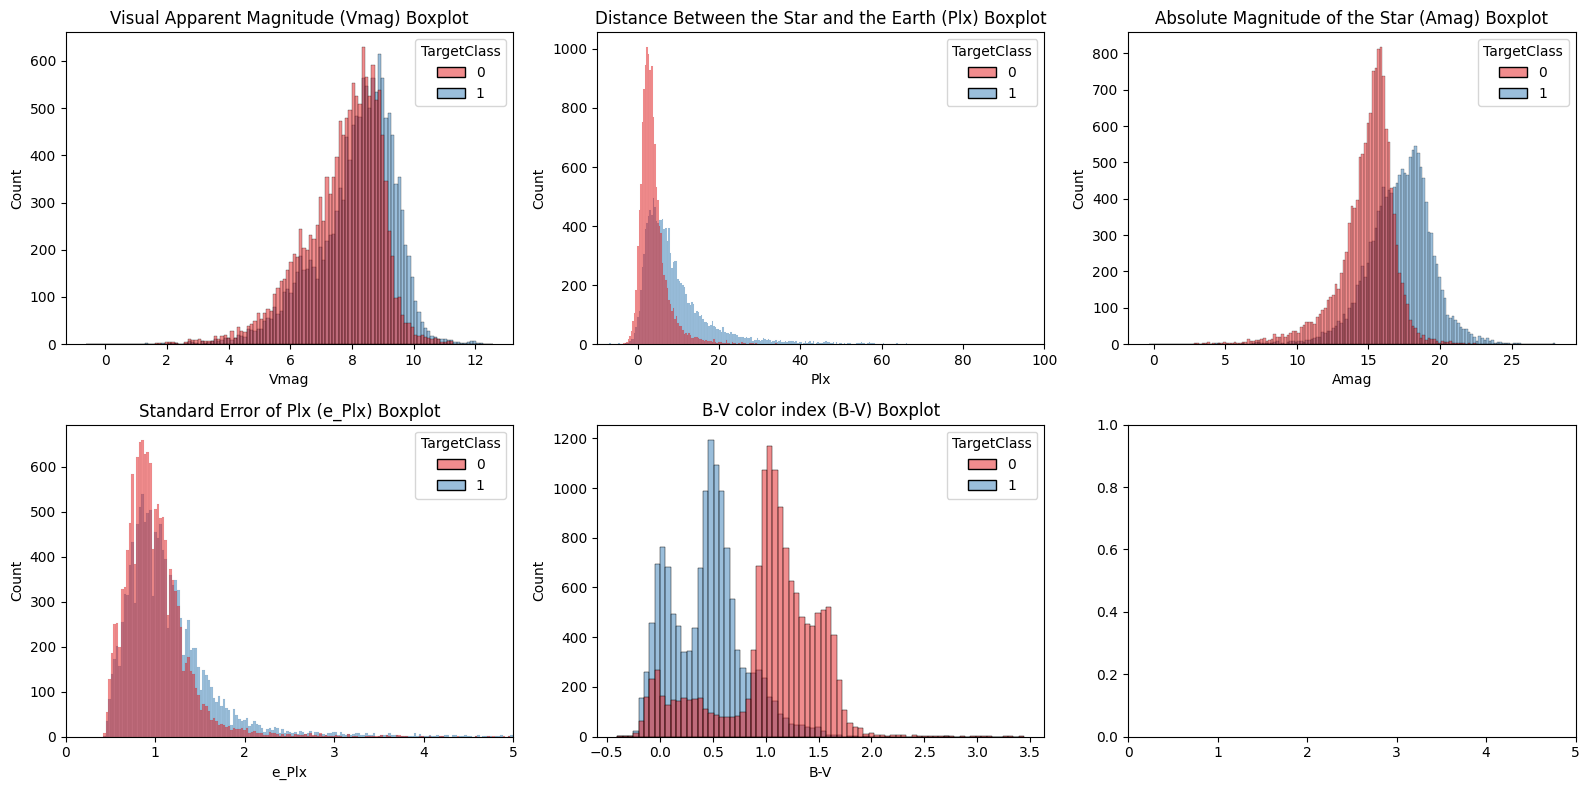

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Histogram for Vmag
sns.histplot(x=train_df["Vmag"], ax=axes[0, 0], hue= train_df["TargetClass"], palette= "Set1")
axes[0, 0].set_title("Visual Apparent Magnitude (Vmag) Boxplot")

# Histogram for Plx
# There are some outliears, so we gonna take  a closer look the values from -10 to 100 
sns.histplot(x=train_df["Plx"], ax=axes[0, 1],hue =train_df["TargetClass"], palette= "Set1").set_xlim(-10,100)
axes[0, 1].set_title("Distance Between the Star and the Earth (Plx) Boxplot")

# Histogram for e_Plx
# There are some outliears, so we gonna take  a closer look the values from 0 to 5
sns.histplot(x=train_df["e_Plx"], ax=axes[1, 0],hue=train_df["TargetClass"], palette= "Set1").set_xlim(0,5)
axes[1, 0].set_title("Standard Error of Plx (e_Plx) Boxplot")

# Histogram for B-V
sns.histplot(x=train_df["B-V"], ax=axes[1, 1], hue = train_df["TargetClass"], palette= "Set1")
axes[1, 1].set_title("B-V color index (B-V) Boxplot")

# Histogram for e_Plx
sns.histplot(x=train_df["Amag"], ax=axes[0, 2], hue = train_df["TargetClass"], palette= "Set1")
axes[0, 2].set_title("Absolute Magnitude of the Star (Amag) Boxplot")
plt.xlim(0,5)

# Show the plot
plt.tight_layout()
plt.show()

##### Box Plot

Now lets see the distribution of each attribute but this time using boxplots to identiy possible outliers

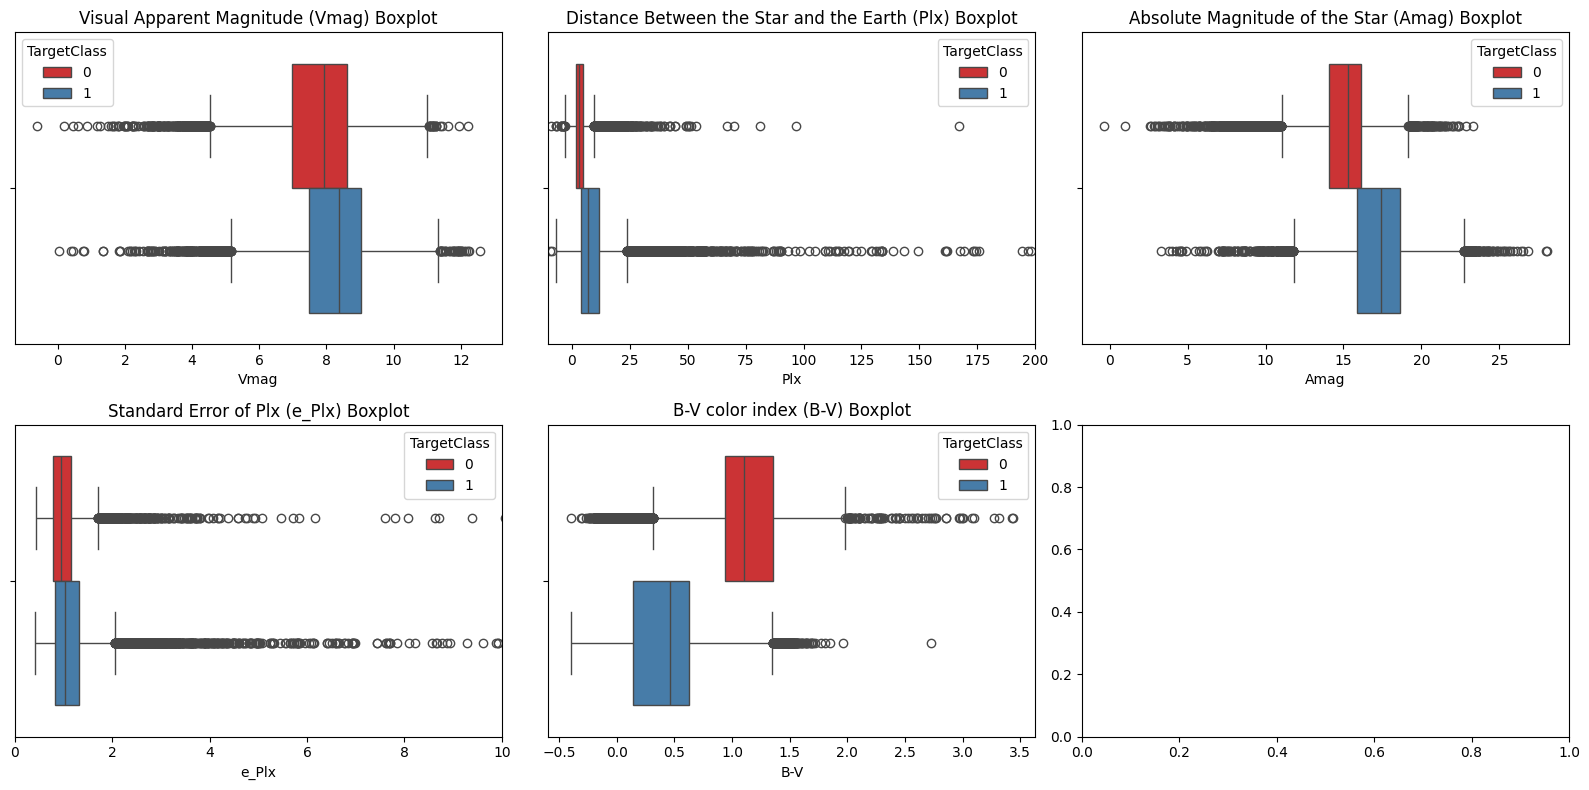

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Boxplot for Vmag
sns.boxplot(x=train_df["Vmag"], ax=axes[0, 0], hue= train_df["TargetClass"], palette= "Set1")
axes[0, 0].set_title("Visual Apparent Magnitude (Vmag) Boxplot")

# Boxplot for Plx
# There are some outliears, so we gonna take  a closer look the values from -10 to 100 
sns.boxplot(x=train_df["Plx"], ax=axes[0, 1], hue= train_df["TargetClass"], palette= "Set1").set_xlim(-10,200)
axes[0, 1].set_title("Distance Between the Star and the Earth (Plx) Boxplot")

# Boxplot for e_Plx
# There are some outliears, so we gonna take  a closer look the values from 0 to 5
sns.boxplot(x=train_df["e_Plx"], ax=axes[1, 0], hue= train_df["TargetClass"], palette= "Set1").set_xlim(0,10)
axes[1, 0].set_title("Standard Error of Plx (e_Plx) Boxplot")

# Boxplot for B-V
sns.boxplot(x=train_df["B-V"], ax=axes[1, 1], hue= train_df["TargetClass"], palette= "Set1")
axes[1, 1].set_title("B-V color index (B-V) Boxplot")

# Boxplot for Amag
sns.boxplot(x=train_df["Amag"], ax=axes[0, 2], hue= train_df["TargetClass"], palette= "Set1")
axes[0, 2].set_title("Absolute Magnitude of the Star (Amag) Boxplot")

# Show the plot
plt.tight_layout()
plt.show()

With the Histogram distributin plots we can see for some attributes like (B-V) theres is a notable difference between the distribution suggesting a possible way to classify the stars manually, for some attributes (Amag) and (Vmag) there is also a difference that may be useful for the classification. 
With the box plots we can see that all of them have outliers but for some of them the outliers are only for one class, e.g. in Plx and e_Plx most of the outliers are for the Giant Stars 

##### Countplot

Lets use countplot to see the number of times each class of the target attribute is repeated.

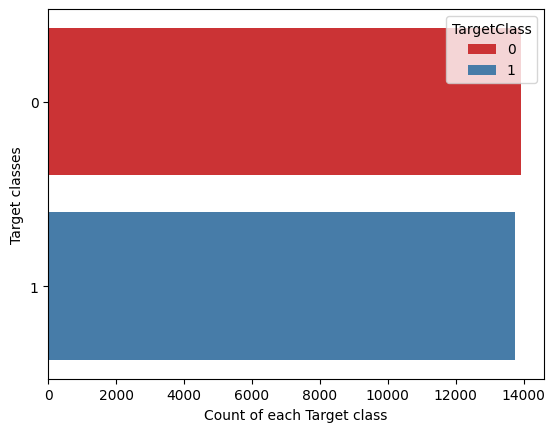

TargetClass
0    13910
1    13758
Name: count, dtype: int64


In [14]:
sns.countplot(y=train_df["TargetClass"] ,data=train_df,palette="Set1", hue = train_df["TargetClass"] )
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Value counts
print(train_df["TargetClass"].value_counts())

### **Important!**
Its clear now that we have very close amount numer of both classes, that indicates that we could be working not only with a **Binary Classication** but a **Balanced Binary Classication**


#### 2.6.2 Multivariate Analysis

##### Heatmap

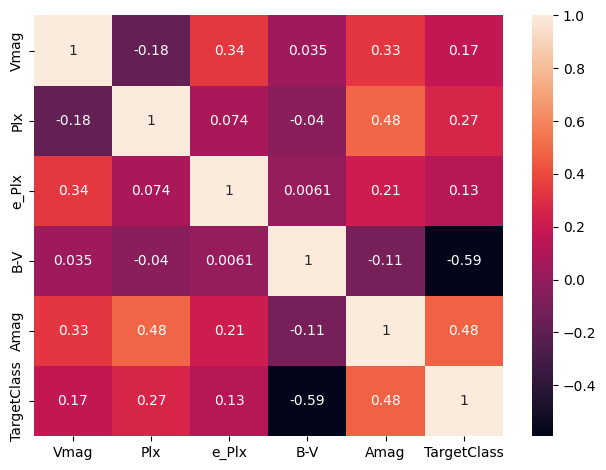

In [15]:
train_df_heatmap = (
    train_df.loc[:, ["Vmag", "Plx", "e_Plx", "B-V", "Amag", "TargetClass"]]
).corr()

sns.heatmap(train_df_heatmap, annot= True)
plt.tight_layout()

Analyzing this heatmap we can see that the greatest correlation between : 
    
    (B-V,TargetClass)  - [-0.59]
    (Amag,TargetClass) - [0.48]
    (Amag,Plx)         - [0.48] 
    (Vmag,Amag)        - [0.33]
    (Vmag,e_Plx)       - [0.34]
    (Plx,TargetClass)  - [0.27]  

### Scatter Plot

This visualization represents the correlation plot between each pair of of columns in the dataset in relation with the two classes (This was done to see if there is a clear division to plot a logistic regression line)

Text(0.5, 1.0, 'Absolute Magnitude of the Star (Amag) Boxplot')

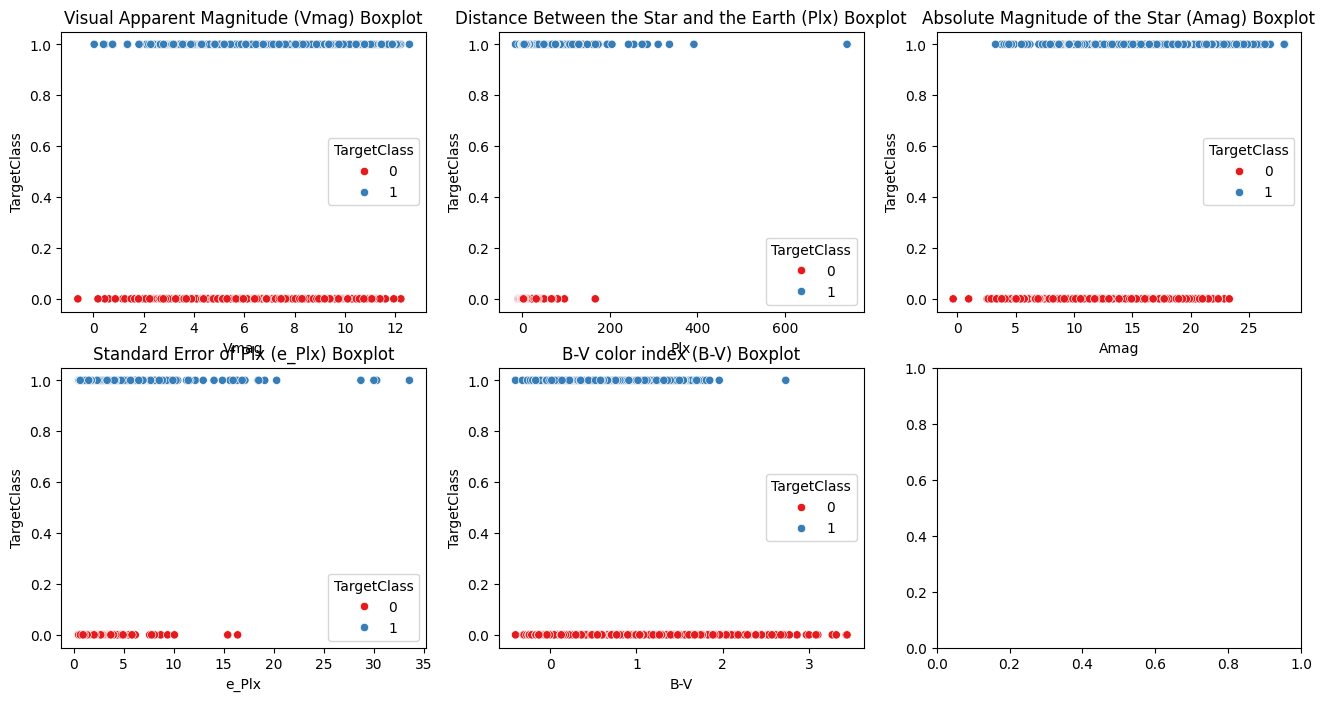

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

sns.scatterplot(x = train_df["Vmag"],y = train_df["TargetClass"], hue = train_df["TargetClass"],palette = "Set1", ax=axes[0, 0])
axes[0, 0].set_title("Visual Apparent Magnitude (Vmag) Boxplot")

sns.scatterplot(x = train_df["Plx"],y = train_df["TargetClass"], hue = train_df["TargetClass"],palette = "Set1", ax=axes[0, 1])
axes[0, 1].set_title("Distance Between the Star and the Earth (Plx) Boxplot")

sns.scatterplot(x = train_df["e_Plx"],y = train_df["TargetClass"], hue = train_df["TargetClass"],palette = "Set1", ax=axes[1, 0])
axes[1, 0].set_title("Standard Error of Plx (e_Plx) Boxplot")

sns.scatterplot(x = train_df["B-V"],y = train_df["TargetClass"], hue = train_df["TargetClass"],palette = "Set1", ax=axes[1, 1])
axes[1, 1].set_title("B-V color index (B-V) Boxplot")

sns.scatterplot(x = train_df["Amag"],y = train_df["TargetClass"], hue = train_df["TargetClass"],palette = "Set1", ax=axes[0, 2])
axes[0, 2].set_title("Absolute Magnitude of the Star (Amag) Boxplot")


We can see that the datapoints have really similar distributions so would be really hard to draw a proper line for example for Logistic Regression

##### Pairplot

With this graph we gonna see how the data points are distributed between two variables

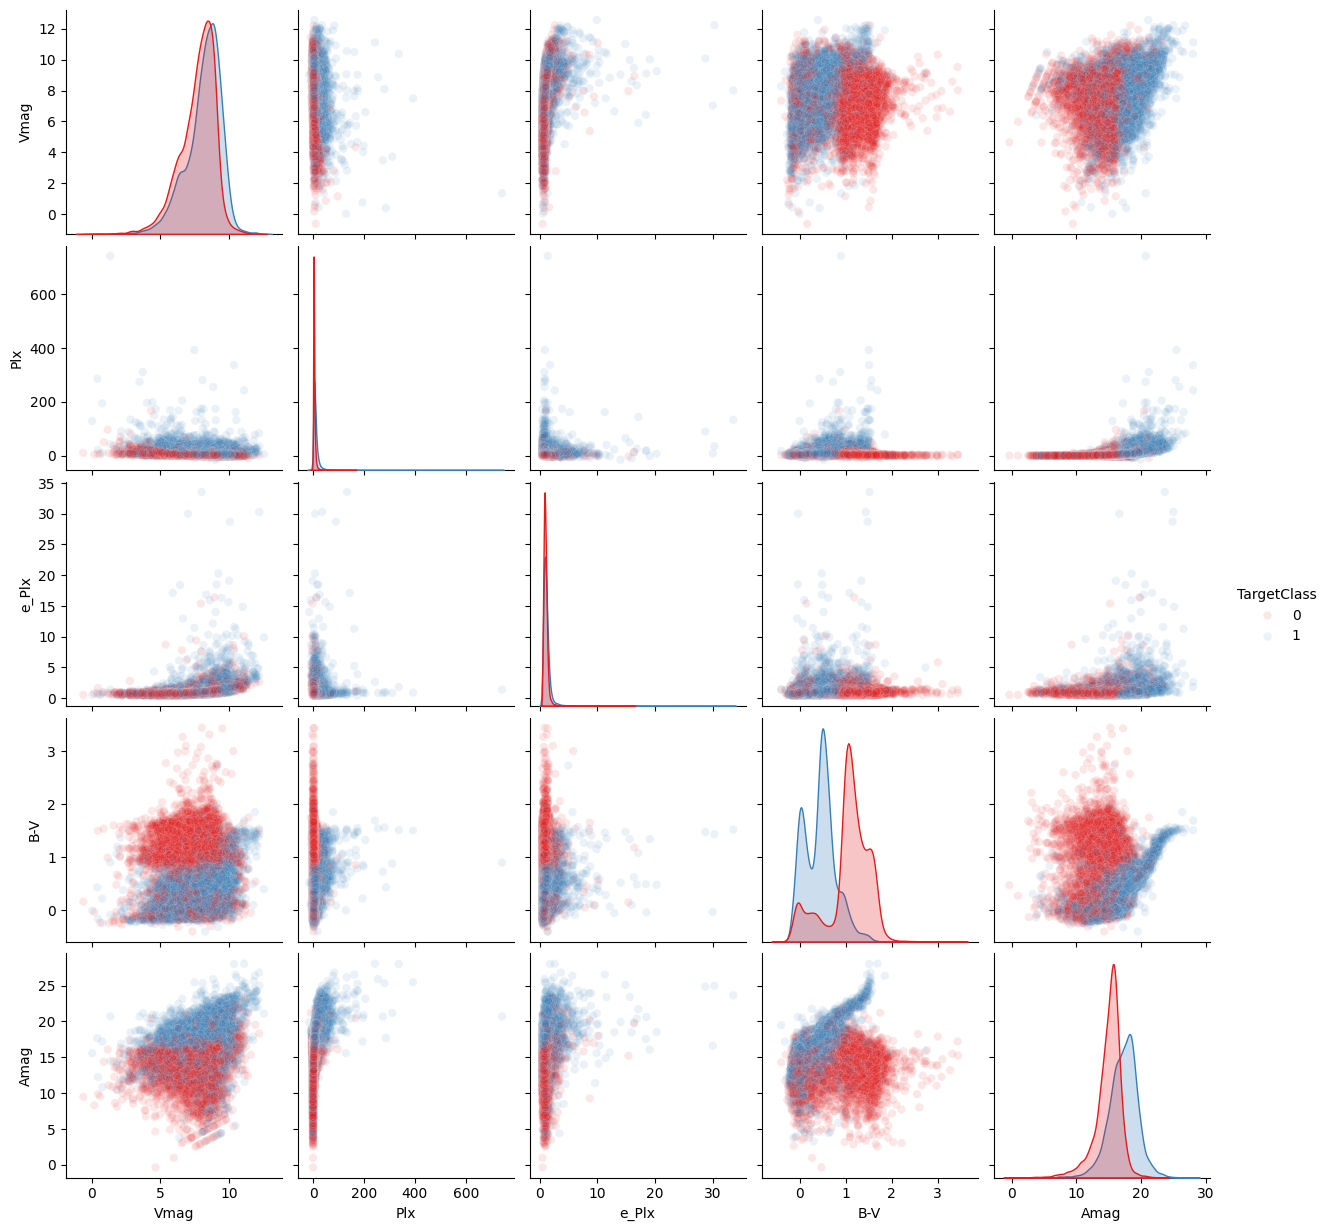

In [17]:
# Dwarf - cool - Red - 0
# Giant - hot - Blue - 1

sns.pairplot(train_df, hue="TargetClass", kind = "scatter", palette= "Set1", plot_kws= {"alpha" : 0.1}, diag_kind= "auto")

With this graph we can get a better idea of how the data points are distributed between the values of two attributes, for some of them the differences are clear while others are really combined.

Those where we can see a clear difference is (B-V,Amag)

In the distribution plots of B-V and Amag, we can see a difference when the values change for 0 and 1.

### 2.7 Exporting the data for data preparation

In [18]:
train_df.to_csv("star_balanced_train.csv", index= False)
val_df.to_csv("Star_balanced_val.csv", index= False)
test_df.to_csv("Star_balanced_test.csv",index= False)

### 2.8 Conclusions


After analyzing the data we can conclude we are working with a dataset consisting of 6 attributes ("Vmag", "Plx", "e_Plx", "B-V", "SpType", "Amag") and a target attribute ("TargetClass") meaning we have a Supervised Learning Problem

### **Important**
**Supervised Learning Problem**

All the attributes are numerical (fortunately no missing values nor NaN values), but SpType which has string values with an interesting observation that the values includes roman numbers (**I** and **V**) and every Type start with different letters.

The target attribute consist of only two numbers (**0**[Dwarf] and **1**[Giant]) this means we are dealing with a *Classification Problem*, speaking more clearly a **Binary Classification Problem**

We took a look on the distributions, thanks to the histograms and the counplot we can confirm that we havea **Balanced Problem**, the boxplots graphs show how the data is distributed on the quartiles and also could identify outliers which are present in all the attributes.

On the multivariable analysis we could find interesting information like the greatest correlation between attributes and how the datapoints(0 and 1) are distributed depending on the values of two variables different values.

For the next part of the project (Data Preparation) we can try to find an useful transformation for SpType column, with the correlation values we can try to add new attributes and scale the data for the models.

After that we can then use models that can fit this problem such as *Logistic Regression*, *SVM*, *Random Forest*, etc.


## Chapter 3 Data Preparation

### 3.1 Feature Engineering

#### 3.1.1 Extracting the first letter attribute SpType

In [22]:
def sptype_letter(df_input):
    # Copy the input DataFrame to avoid modifying the original data
    df = df_input.copy()
    
    # Extract the first letter for the Harvard Spectral Classification
    df["SpType_Letter"] = df["SpType"].str.extract(r"([OBAFGKM])")

    return df
df = sptype_letter(df)
#### Lets also do it for validation and test set
# Validation set 
validation_set = pd.read_csv("star_balanced_val.csv")
validation_set = sptype_letter(validation_set)

#test set

test_set = pd.read_csv("Star_balanced_test.csv")
test_set = sptype_letter(test_set)

df


Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass  \
0      10.00  31.66   6.19  1.213    K7V  22.502556            1   
1       8.26   3.21   1.00  1.130  K0III  15.792525            0   
2       8.27  12.75   1.06  0.596    F9V  18.797552            1   
3       6.54   5.23   0.76  1.189  K1III  15.132508            0   
4       8.52   0.96   0.72  0.173    B8V  13.431356            1   
...      ...    ...    ...    ...    ...        ...          ...   
39547   5.83   0.17   0.52  0.474  B7Iab   6.982245            0   
39548   7.05  18.12   0.92  0.424    F5V  18.340790            1   
39549   9.21   3.89   1.46  0.227   A1IV  17.159748            1   
39550   9.01   2.13   1.46  1.467  M5III  15.651898            0   
39551   9.12   3.82   0.79  0.480    F5V  17.030317            1   

      SpType_Letter  Temperature  
0                 K  4283.376572  
1                 K  4450.829467  
2                 F  5983.249562  
3                 K  4330.424364  
4                 B  8378.029506  
...             ...          ...  
39547             B  6509.208024  
39548             F  6754.967419  
39549             A  7959.765728  
39550             M  3843.826923  
39551             F  6481.008924  

[39552 rows x 9 columns]

#### Counplots graphs to see the obtained new categorical values and the number of each one is repeated


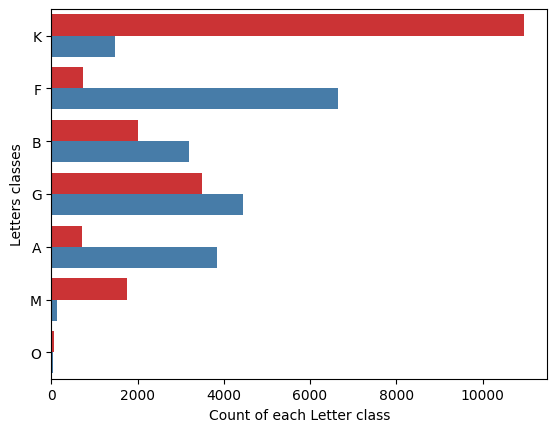

SpType_Letter
K    12425
G     7951
F     7370
B     5203
A     4547
M     1893
O      111
Name: count, dtype: int64


In [23]:
sns.countplot(y=df["SpType_Letter"] ,data=df ,palette= "Set1", legend= False, hue = df["TargetClass"])
plt.xlabel("Count of each Letter class")
plt.ylabel("Letters classes")
plt.show()

# Value counts
print(df["SpType_Letter"].value_counts())

### 3.1.2 Temperature Ballesteros

We found out there is a way to calculate the temperature using the B-V attribute.This was done since after trying to use SpyTyoe atttribute elements like the Letter and Roman Number the Performance was almost 98. I try another approach.

Ballesteros’ formula, is  a way to calculate the temperature of a star from the B-V color attribute. The formula is thje next :

$$ T = \frac{4600 \text{K}}{\left(0.92 \times (B-V) + 1.7\right) + \left(0.92 \times (B-V) + 0.62\right)} $$


(Converting between Effective Temperature and Stellar Color — PyAstronomy 0.22.0beta Documentation, 2015) 

In [24]:
# Function to calculate temperature using Ballesteros" formula
def calculate_temperature_ballesteros(bv_color):
    return 4600 * ((1 / (0.92 * bv_color + 1.7)) + (1 / (0.92 * bv_color + 0.62)))

# Creating a new column
df["Temperature"] = df["B-V"].apply(calculate_temperature_ballesteros)
validation_set["Temperature"] = df["B-V"].apply(calculate_temperature_ballesteros)
test_set["Temperature"] = df["B-V"].apply(calculate_temperature_ballesteros)

df

Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass  \
0      10.00  31.66   6.19  1.213    K7V  22.502556            1   
1       8.26   3.21   1.00  1.130  K0III  15.792525            0   
2       8.27  12.75   1.06  0.596    F9V  18.797552            1   
3       6.54   5.23   0.76  1.189  K1III  15.132508            0   
4       8.52   0.96   0.72  0.173    B8V  13.431356            1   
...      ...    ...    ...    ...    ...        ...          ...   
39547   5.83   0.17   0.52  0.474  B7Iab   6.982245            0   
39548   7.05  18.12   0.92  0.424    F5V  18.340790            1   
39549   9.21   3.89   1.46  0.227   A1IV  17.159748            1   
39550   9.01   2.13   1.46  1.467  M5III  15.651898            0   
39551   9.12   3.82   0.79  0.480    F5V  17.030317            1   

      SpType_Letter  Temperature  
0                 K  4283.376572  
1                 K  4450.829467  
2                 F  5983.249562  
3                 K  4330.424364  
4                 B  8378.029506  
...             ...          ...  
39547             B  6509.208024  
39548             F  6754.967419  
39549             A  7959.765728  
39550             M  3843.826923  
39551             F  6481.008924  

[39552 rows x 9 columns]

If we put attention we can see that the values of temperature is really accurate with the temperatures ranges of SpType_Letter, that means we can consider the temperature function correct.

### 3.1.3 Dealing with outliers

A recommendation from the autor is "Drop the Row if you find the e_Plx is too high!"

We decided to do it and also for Plx, trying to make sure not dropping many rows

TargetClass
1    486
0     84
Name: count, dtype: int64


Vmag     Plx  e_Plx    B-V    SpType       Amag  TargetClass  \
0      10.00   31.66   6.19  1.213       K7V  22.502556            1   
88      8.60   23.42   6.63  0.540      F7IV  20.447935            1   
135    10.36   -2.10   8.08  0.455      B0II  16.971096            0   
324     8.59   15.32   6.93  0.250       A3V  19.516294            1   
346     9.56    0.95   5.74  0.363  F2III/IV  14.448618            1   
...      ...     ...    ...    ...       ...        ...          ...   
39100   8.83   -2.35  12.16  0.070       B3V  15.685339            1   
39151  10.26    5.18   4.52  0.140    B9IV/V  18.831650            1   
39255   4.33  167.08   1.07  0.855   K2:III:  20.444622            0   
39269   9.18    7.77   3.90  0.609       G0V  18.632107            1   
39476   8.23   -6.21   3.58  1.360  K2II+...  17.195457            0   

      SpType_Letter  Temperature  
0                 K  4283.376572  
88                F  6212.866018  
135               B  6600.284253  
324               A  7795.184395  
346               F  7083.603180  
...             ...          ...  
39100             B  9328.334231  
39151             B  8658.472979  
39255             K  5120.212718  
39269             G  5932.526371  
39476             K  4017.003511  

[570 rows x 9 columns]

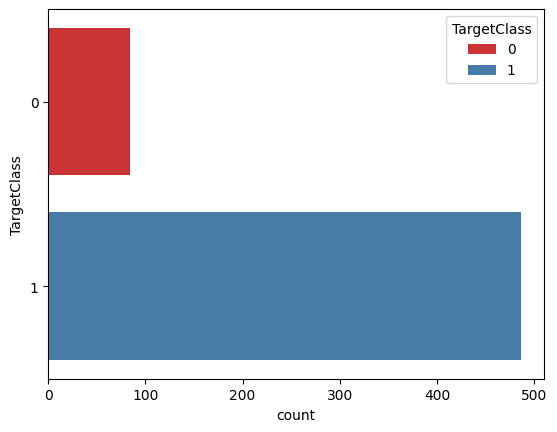

In [25]:
# Defininf threshold for high e_Plx and Plx values
threshold_e_Plx = 1.5 * df["e_Plx"].quantile(0.97)
threshold_Plx = 1.5 * df["Plx"].quantile(0.99)

# We drop out the outliers
df_without_outliers = df[df["e_Plx"] <= threshold_e_Plx]
df_without_outliers = df_without_outliers[df_without_outliers["Plx"] <= threshold_Plx]

# We define this variable to check that we make sure we are not dropping many values that could lead to overfitting
rest = df[~df.index.isin(df_without_outliers.index)]

# Plotting the total Targetclass values dropped
sns.countplot(y=rest["TargetClass"] ,data=rest,palette="Set1", hue= rest["TargetClass"])
print(rest["TargetClass"].value_counts())

rest


At the end we dropped 349 columnsto prevent overfitting

#### 3.1.4 Creating new features

Since we have few attributes so far I have decided to included some attributes taking in account the most important attributes that we found in the correlation heatmap
After trying different ideas, like multyplying, dividing, substracting, adding different values, and also applying log_transformations and polynomial features.
We found that the most useful were Amag^2, log(Vmag) and Vmag-Amag since were the ones with highest correlation.


##### Function for the new columns

In [27]:
def new_columns(df_input):
    df = df_input.copy()
    
    df["Amag^2"] = df["Amag"] ** 2
    df["log_Vmag"] = np.log(df["Vmag"])
    df["Vmag-Amag"] = df["Vmag"] - df["Amag"]
    
    return df

df_without_outliers = new_columns(df_without_outliers)
validation_set = new_columns(validation_set)
test_set = new_columns(test_set)


##### Heatmap to confirm the new attributes can be useful

<Axes: >

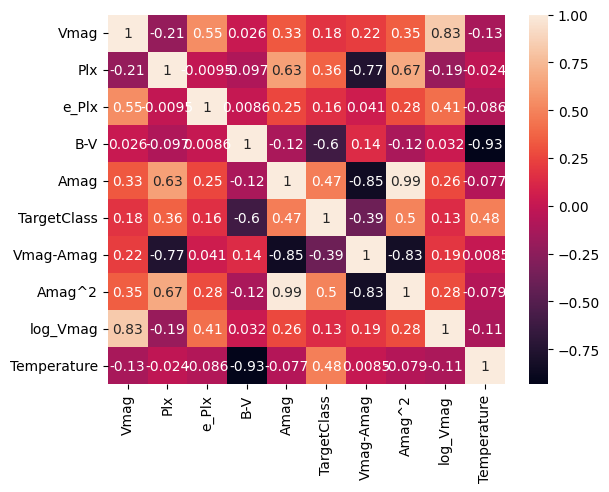

In [28]:
heatmap = (
    df_without_outliers.loc[:, ["Vmag", "Plx", "e_Plx", "B-V", "Amag","TargetClass","Vmag-Amag","Amag^2","log_Vmag","Temperature"]]
).corr()

sns.heatmap(heatmap, annot= True)

We can see that the correlation look to have good results like Amag^2 and may be useful for the classification

##### Scatter Plot 

Lets see how the new attributes behave with different values

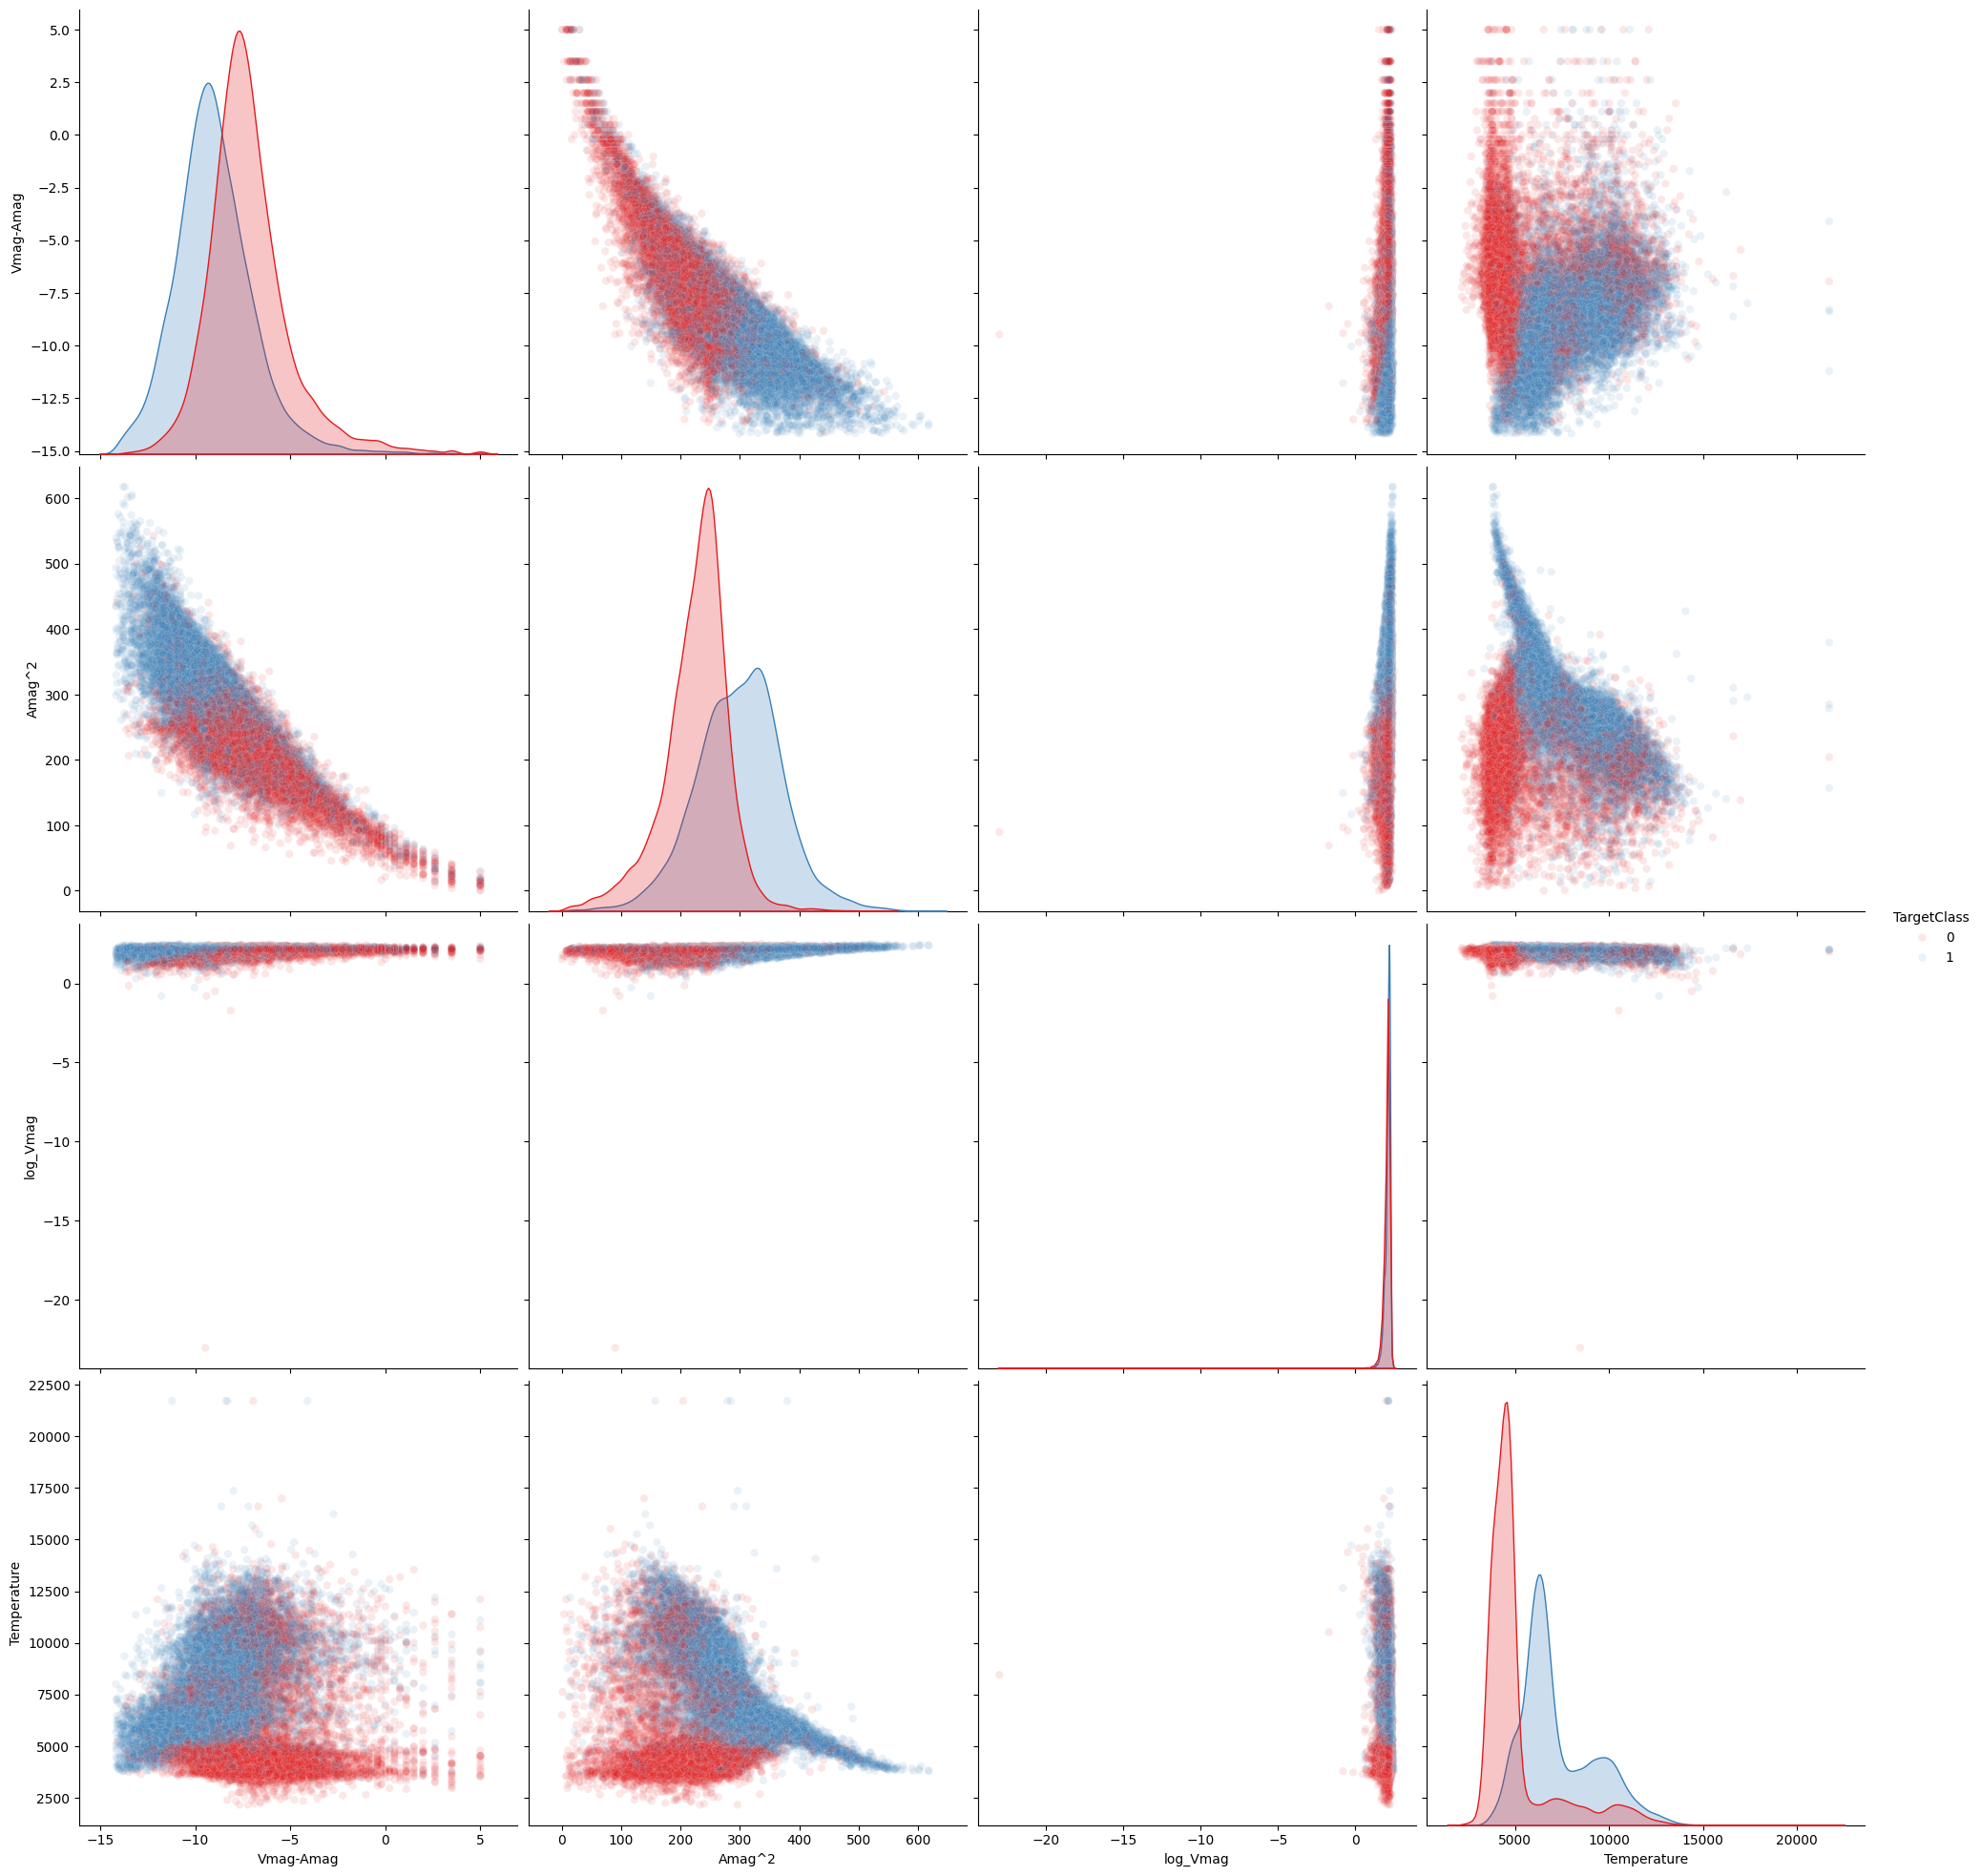

In [29]:
# Dwarf - Hot - Red - 0
# Giant - Cool - Blue - 1
pairplott = (
    df_without_outliers.loc[:, ["TargetClass","Vmag-Amag","Amag^2","log_Vmag","Temperature"]]
)
sns.pairplot(pairplott, hue="TargetClass", kind = "scatter", palette= "Set1", plot_kws= {"alpha" : 0.1}, diag_kind= "auto", height= 5)

For the new attributes there is a clear difference between values range on Vmag-Amag, Amag^2 and Temperature this can tell us they can bee indeed useful

### 3.1.5 Visualizing Hertzsprung-Russell Diagram

Just for checking if we are doing a good job with the data. I decided to replicate the  Hertzsprung-Russell diagram with the data I have and indeed the graph look really accurate.

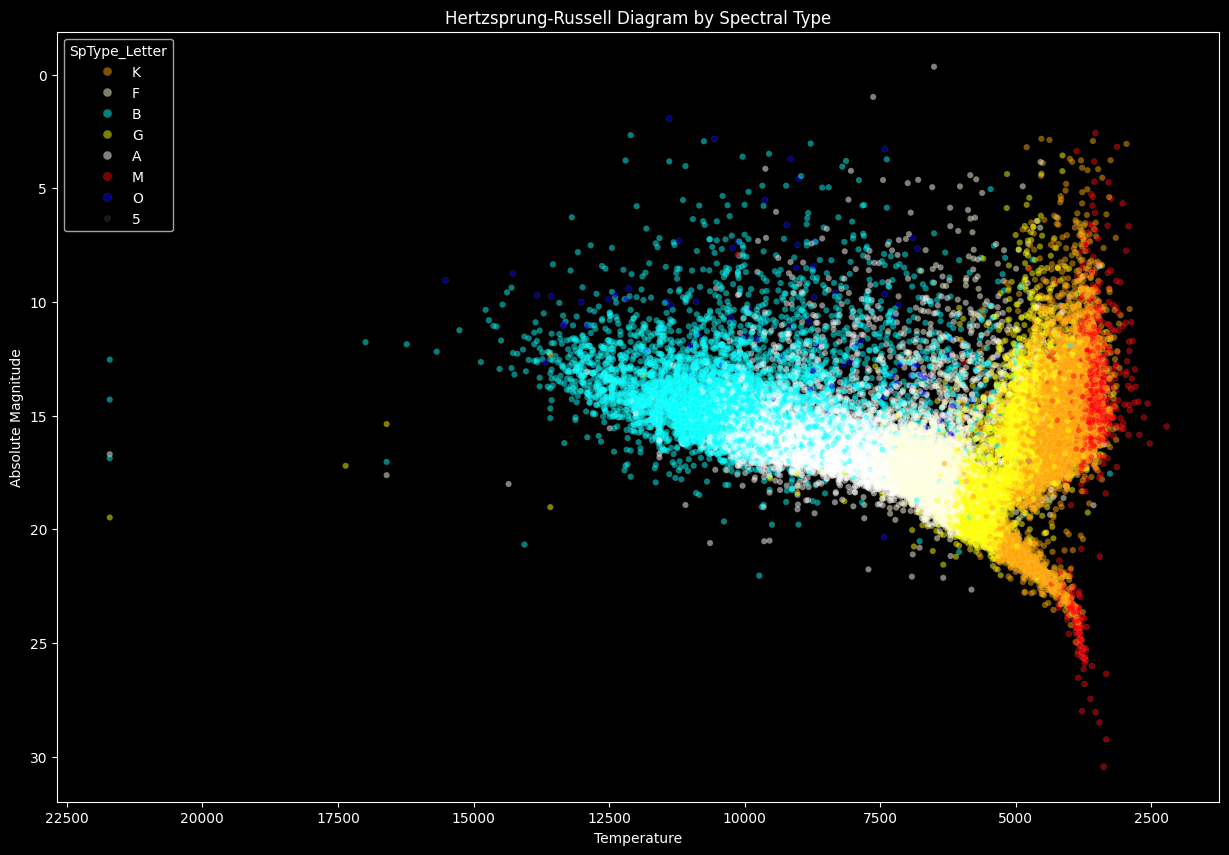

In [30]:
plt.style.use('dark_background')

# Defining the close color as stated above
color_map = {
    "O": "blue",        # O type stars will be blue
    "B": "cyan",        # B type stars will be cyan
    "A": "white",       # A type stars will be white
    "F": "lightyellow", # F type stars will be light yellow
    "G": "yellow",      # G type stars will be yellow
    "K": "orange",      # K type stars will be orange
    "M": "red"          # M type stars will be red
}

# Now, let"s plot the data points with white edges
plt.figure(figsize=(15, 10))

# Using seaborn"s scatterplot for this
sns.scatterplot(x="Temperature", y="Amag", data=df, hue="SpType_Letter", palette=color_map, edgecolor="white", linewidth=0.1,alpha = 0.5,size=5)

# Inverting the y-axis because in astronomy, the higher the magnitude, the dimmer the starr
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

# Adding labels and title with white font
plt.xlabel("Temperature", color="white")
plt.ylabel("Absolute Magnitude", color="white")
plt.title("Hertzsprung-Russell Diagram by Spectral Type", color="white")


# Display the plot
plt.show()


#### 3.1.6 Final Result

This is how our new data looks like. In general we took the first letter and eventought I didnt include it for the final dataset was useful to see that the new created attribute *Temperature* was good created since the temperature values match with the letters, then we try different techniques to create new attributes, at the end I choose three that were with more correlation. 

#### 3.1.7 Exporting the data for the models

Temperature already satisfies this function

In [31]:
df_without_outliers = df_without_outliers.drop(["SpType", "SpType_Letter"], axis=1)
X_train = df_without_outliers.drop(["TargetClass"], axis= 1)
y_train = df_without_outliers[["TargetClass"]]


Attributes on X_train

In [34]:
X_train

Vmag    Plx  e_Plx    B-V       Amag  Temperature      Amag^2  \
1      8.26   3.21   1.00  1.130  15.792525  4450.829467  249.403846   
2      8.27  12.75   1.06  0.596  18.797552  5983.249562  353.347961   
3      6.54   5.23   0.76  1.189  15.132508  4330.424364  228.992798   
4      8.52   0.96   0.72  0.173  13.431356  8378.029506  180.401324   
5      6.09   6.02   0.95  0.040  14.987983  9652.203136  224.639634   
...     ...    ...    ...    ...        ...          ...         ...   
39547  5.83   0.17   0.52  0.474   6.982245  6509.208024   48.751738   
39548  7.05  18.12   0.92  0.424  18.340790  6754.967419  336.384578   
39549  9.21   3.89   1.46  0.227  17.159748  7959.765728  294.456951   
39550  9.01   2.13   1.46  1.467  15.651898  3843.826923  244.981911   
39551  9.12   3.82   0.79  0.480  17.030317  6481.008924  290.031697   

       log_Vmag  Vmag-Amag  
1      2.111425  -7.532525  
2      2.112635 -10.527552  
3      1.877937  -8.592508  
4      2.142416  -4.911356  
5      1.806648  -8.897983  
...         ...        ...  
39547  1.763017  -1.152245  
39548  1.953028 -11.290790  
39549  2.220290  -7.949748  
39550  2.198335  -6.641898  
39551  2.210470  -7.910317  

[38982 rows x 9 columns]

Target class on y_train

In [35]:
y_train

TargetClass
1                0
2                1
3                0
4                1
5                1
...            ...
39547            0
39548            1
39549            1
39550            0
39551            1

[38982 rows x 1 columns]

We also include the new columns to the **validation set** and **test set**


In [32]:
validation_set = validation_set.drop(["SpType", "SpType_Letter"], axis=1)
X_val = validation_set.drop(["TargetClass"], axis= 1)
y_val = validation_set[["TargetClass"]]


test_set =  test_set.drop(["SpType", "SpType_Letter"], axis=1)
X_test = test_set.drop(["TargetClass"], axis= 1)
y_test = test_set[["TargetClass"]]


X_train.to_csv("star_balanced_x_train.csv",index = False)
y_train.to_csv("star_balanced_y_train.csv",index = False)

X_val.to_csv("star_balanced_x_val.csv",index = False)
y_val.to_csv("star_balanced_y_val.csv",index = False)

X_test.to_csv("star_balanced_x_test.csv",index = False)
y_test.to_csv("star_balanced_y_test.csv",index = False)

## Chapter 4 Model Selection

We gonna divide the model selection in sections(called rounds) this is because the power limitations of my computer.

### 4.1 First Round - Quick-and-dirty models selection

A quick-and-dirty different categories models will be perform in order to find the best 5 promising models, to achieve this we gonna use tools like

    Cross Validation
    Accuracy
    Standard Deviation

Cross-validation is gonna be used to run the models and accuracy and standard deviation will be the metrics to compare the models and find the best ones

The models selected were of course *classification models*:

    Categorie               Model
    Decision Tree  - DecisionTreeClassifier
    Neighbors      - KNeighborsClassifier
    Linear_model   - LogisticRegression
    Neural network - MLPClassifier
    Ensemble       - RandomForestClassifier
    Linear_model   - GDClassifier
    SVM            - SVC
    Naive bayes    - BernoulliNB

#### 4.1.1 Importing the train and validation set

In [36]:
X_train = pd.read_csv("star_balanced_x_train.csv")
y_train = pd.read_csv("star_balanced_y_train.csv")

X_val = pd.read_csv("star_balanced_x_val.csv")
y_val = pd.read_csv("star_balanced_y_val.csv")

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

#### 4.1.2 Models Implementation

In [37]:
# Decision Tree
decision_tree = DecisionTreeClassifier()

# K-Nearest Neighbours
kNN = KNeighborsClassifier()

# Logistic Regresiopn
logreg = LogisticRegression(max_iter= 3000)

# Multi-Layer Perceptron Classifier
nn = MLPClassifier()

# Random Forest
random_forest = RandomForestClassifier()

# GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Support Vector Machine
svm = SVC()

# Bernoulli Naive Bayes
bnb = BernoulliNB()


#### 4.1.3 Measure of each model

We gonna print a table to compare the result of each model, and then choosing the best 5.

In [40]:
# Preparing the table
table = []
# Models
models = {
    "DecisionTreeClassifier": decision_tree,
    "KNeighborsClassifier": kNN,
    "LogisticRegression": logreg,
    "MLPClassifier": nn,
    "RandomForestClassifier": random_forest,
    "GradientBoostingClassifier": gbc,
    "SVM": svm,
    "BernoulliNB": bnb
}

# N-fold cross-validation that compute the accuracy, mean, and standard deviation and accuracy on val set
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv = 3, scoring="accuracy")
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)

    table.append([name, scores.mean(), scores.std(),accuracy])

# Print the table
print(tabulate(table, headers=["Model", "Mean Accuracy", "Standard Deviation","Accuracy"],tablefmt="fancy_grid"))

╒════════════════════════════╤═════════════════╤══════════════════════╤════════════╕
│ Model                      │   Mean Accuracy │   Standard Deviation │   Accuracy │
╞════════════════════════════╪═════════════════╪══════════════════════╪════════════╡
│ DecisionTreeClassifier     │        0.819686 │           0.00339724 │   0.6367   │
├────────────────────────────┼─────────────────┼──────────────────────┼────────────┤
│ KNeighborsClassifier       │        0.864963 │           0.00166526 │   0.596034 │
├────────────────────────────┼─────────────────┼──────────────────────┼────────────┤
│ LogisticRegression         │        0.872146 │           0.00399708 │   0.876659 │
├────────────────────────────┼─────────────────┼──────────────────────┼────────────┤
│ MLPClassifier              │        0.769894 │           0.0801994  │   0.849773 │
├────────────────────────────┼─────────────────┼──────────────────────┼────────────┤
│ RandomForestClassifier     │        0.876661 │           0.0016

#### 4.1.4 Conlusions 


With a First Round of Model Selection we can see that:
 
The best 5 models overall were :

    1. GradientBoostingClassifier - (good mean cv accuracy and very similar accuracy on val set that show we shouldnt not have overfitting)
    2. RandomForestClassifier     - (good mean cv accuracy and good accuracy on val set that show we might not have overfitting)
    3. LogisticRegression         - (good mean cv accuracy and but the accuracy on val set is not as good we should have overfitting)
    4. KNeighborsClassifier       - (good mean cv accuracy and bad accuracy on val set that show we have overfitting)
    5. SVM                        - (good mean cv accuracy and bad accuracy on val set that show we have overfitting)

(The models were chosen after many runs, since many times models like MLP or Decision Trees sometimes are also good but most of the times overfit)

So now we gonna try to find the best hyperparameyer on each model to choose the best three and finally work deeper with those three

### 4.2 Second Round Fine-tuning 

This time I will evaluate and compare the models one more time, but now Im gonna fine-tuning the models to find the best hyperparameter for each model.

To achieve this we gonna use some tools like :

    GridSearch
    Pipeline

To evalute I gonna use again the accuracy for the cv and the validation set and the standar deviation and then choose the final three best performance models.
This round is used to get used to the implementation of models and use techniques like GridSearch and Pipelines to implement Transformations(Scaling) and Pipelines to implement differents steps (Transformation on data and Model implementation) and ensure no data leaking.

#### 4.2.1 Creating Pipelines

For this time we gonna only scale the data and define the models (I also try normalization but the results were really bad)


In [41]:
# Logistic Regresiopn
pipeline_logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", logreg)
])

# KNeighborsClassifier
pipeline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", kNN)
])

# Random Forest
pipeline_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest", random_forest)
])

# GradientBoostingClassifier
pipeline_gbc = Pipeline([
    ("scaler", StandardScaler()),
    ("gbc", gbc)
])

# Support Vector Classifier
pipeline_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", svm)
])

# Example how it looks
pipeline_logreg

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=2000))])

#### 4.2.2 Creating Paramters grids

I create a paramater grid for each model. For the hyperparameters I used the most comoon and because of my computer power I define only a few options in order to not exceed time.

In [42]:
# Logistic Regression
param_grid_logreg = {
    "logreg__C": [0.001, 0.01, 0.1],
    "logreg__solver": ["liblinear", "saga"],
    "logreg__penalty" : [None,"l1"]
}

# KNeighborsClassifier
param_grid_knn = {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"]
}

# Random Forest
param_grid_rf = {
    "random_forest__max_features": [9, 10, 15],
    "random_forest__max_leaf_nodes": [500, 600],
    "random_forest__max_depth": [12, 15],
}

# GradientBoostingClassifier
param_grid_gbc = {
    "gbc__loss": ["log_loss", "exponential"],
    "gbc__learning_rate": [0.1, 0.2],
    "gbc__max_depth": [3, 5],
}

# Support Vector Classifier
param_grid_svc = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "poly", "rbf"],
    "svm__gamma": ["scale", "auto"]
}

#### 4.2.3 GridSearch

For the GridSearch I create again one for each. I define a total of 5 cross-validation sets. The metric for evaluating the model will be *accuracy*

In [43]:
# Logistic Regression
grid_search_logreg = GridSearchCV(pipeline_logreg, 
                           param_grid= param_grid_logreg, 
                           cv=5, 
                           scoring= "accuracy",
                           return_train_score= True)

# KNeighborsClassifier
grid_search_knn = GridSearchCV(pipeline_knn, 
                           param_grid= param_grid_knn, 
                           cv=5, 
                           scoring= "accuracy",
                           return_train_score= True)

# Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, 
                           param_grid= param_grid_rf, 
                           cv=5, 
                           scoring= "accuracy",
                           return_train_score= True)

# GradientBoostingClassifier
grid_search_gbc = GridSearchCV(pipeline_gbc, 
                           param_grid= param_grid_gbc, 
                           cv=5, 
                           scoring= "accuracy",
                           return_train_score= True)

# Support Vector Classifier
grid_search_svc = GridSearchCV(pipeline_svc, 
                           param_grid= param_grid_svc, 
                           cv=5, 
                           scoring= "accuracy",
                           return_train_score= True)

grid_search_logreg

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=2000))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1],
                         'logreg__penalty': [None, 'l1'],
                         'logreg__solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='accuracy')

##### Function for results of gridsearch

With this function the model will be fitted and show the results : *Mean CV Accuracy*, *Accuracy on Validation Set*,*Standard Deviation* and *Best Hyperparameters*
I decided to plot the models separately to check the running time of each model.

In [57]:
def evaluate_model(grid_search, X_train, y_train):
    grid_search.fit(X_train,y_train)

    # Calculate cross-validated scores on the training set
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)

    # Calculate mean and standard deviation of the cross-validated scores
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    # Best hyperparameters
    best_hyperparameters = grid_search.best_params_

    # Predict on validation set
    y_val_pred = grid_search.predict(X_val)

    # Calculate accuracy  validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Print the results in a tabulated format
    results_table = [
        ["Mean CV Accuracy", f"{mean_cv_score:.4f}"],
        ["Standard Deviation", f"{std_cv_score:.4f}"],
        ["Best Hyperparameters", best_hyperparameters],
        ["Validation Set Accuracy", f"{val_accuracy:.4f}"],

    ]

    print(tabulate(results_table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


#### 4.2.4 Best Hyperparameters and scores
##### GridSearch Logistic Regression

In [46]:
# Ignorel warnings(Im not ignoring any important warning, it is just that when the gridsearch use penalty None, it shows a warning that C and l1 will be ignored)
warnings.filterwarnings("ignore")

evaluate_model(grid_search=grid_search_logreg,X_train=X_train,y_train=y_train)


╒═════════════════════════╤═════════════════════════════════════════════════════════════════════════════╕
│ Metric                  │ Value                                                                       │
╞═════════════════════════╪═════════════════════════════════════════════════════════════════════════════╡
│ Mean CV Accuracy        │ 0.8791                                                                      │
├─────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Standard Deviation      │ 0.0016                                                                      │
├─────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Best Hyperparameters    │ {'logreg__C': 0.01, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'} │
├─────────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Validation Set Accuracy │ 0.8797            

We can see that the model perform pretty good.
The performance of the model compared with the first round with default values went from :

    Performance

    Metric          First round    Second Round

    Accuracy CV     0.873638   ---> 0.8791  
    Standard Dev    0.0122341  ---> 0.0016  
    Accuracy Val    0.717614   ---> 0.8765 


It can clearly be seen there was a good increase in all the metrics, specially the accuracy in the validation set which was as good as the accuracy on the CV, this should show that we dont have no more overfitting.

Running time : 2m 10 seg

##### GridSearch KNeighbors Classifier

In [47]:
evaluate_model(grid_search=grid_search_knn,X_train=X_train,y_train=y_train)

╒═════════════════════════╤════════════════════════════════════════════════════════════════════════════════╕
│ Metric                  │ Value                                                                          │
╞═════════════════════════╪════════════════════════════════════════════════════════════════════════════════╡
│ Mean CV Accuracy        │ 0.8758                                                                         │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ Standard Deviation      │ 0.0032                                                                         │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ Best Hyperparameters    │ {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'} │
├─────────────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ Validation Set Ac

We can see that the model perform really good.
The performance of the model compared with the first round with default values went from :

    Performance

    Metric          First round    Second Round

    Accuracy CV     0.865025   ---> 0.8791    
    Standard Dev    0.0122341  ---> 0.0032  
    Accuracy Val    0.564111   ---> 0.8345 


It can clearly be seen there was a huge increase in the accuracy of validation set, and this time was almost as good as the accuracy on the CV, this should show that we dont have no more overfitting.

Running time : 2m 45 seg

##### GridSearch Random Forest

In [48]:
evaluate_model(grid_search=grid_search_rf,X_train=X_train,y_train=y_train)

╒═════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Metric                  │ Value                                                                                                     │
╞═════════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Mean CV Accuracy        │ 0.8818                                                                                                    │
├─────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Standard Deviation      │ 0.0016                                                                                                    │
├─────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Best Hyperparameters    │ {'random_forest__max

Tthe model perform quite okay.
The performance of the model compared with the first round with default values went from :

    Performance

    Metric          First round    Second Round

    Accuracy CV     0.877098   ---> 0.8818     
    Standard Dev    0.005346   ---> 0.0016  
    Accuracy Val    0.811302   ---> 0.8269


The performance increase with respect of the first round but still is not clear if the model may have overfitting.

Running time - 24m 17seg

##### GridSearch GradientBoostingClassifier

In [58]:
evaluate_model(grid_search=grid_search_gbc,X_train=X_train,y_train=y_train)

╒═════════════════════════╤══════════════════════════════════════════════════════════════════════════════╕
│ Metric                  │ Value                                                                        │
╞═════════════════════════╪══════════════════════════════════════════════════════════════════════════════╡
│ Mean CV Accuracy        │ 0.8834                                                                       │
├─────────────────────────┼──────────────────────────────────────────────────────────────────────────────┤
│ Standard Deviation      │ 0.0017                                                                       │
├─────────────────────────┼──────────────────────────────────────────────────────────────────────────────┤
│ Best Hyperparameters    │ {'gbc__learning_rate': 0.1, 'gbc__loss': 'exponential', 'gbc__max_depth': 5} │
├─────────────────────────┼──────────────────────────────────────────────────────────────────────────────┤
│ Validation Set Accuracy │ 0.8106   

Tthe model perform really good until now is the most robust.
The performance of the model compared with the first round with default values went from :

    Performance

    Metric          First round    Second Round

    Accuracy CV     0.881883   ---> 0.8834      
    Standard Dev    0.005572   ---> 0.0017  
    Accuracy Val    0.842862   ---> 0.8366   


The performance increase with respect of the first round except in the accuracy on the validation set.

Running time - 10m 10seg

### GridSearch Support Vector Classifier


In [59]:
evaluate_model(grid_search=grid_search_svc,X_train=X_train,y_train=y_train)

╒═════════════════════════╤═════════════════════════════════════════════════════════════╕
│ Metric                  │ Value                                                       │
╞═════════════════════════╪═════════════════════════════════════════════════════════════╡
│ Mean CV Accuracy        │ 0.8821                                                      │
├─────────────────────────┼─────────────────────────────────────────────────────────────┤
│ Standard Deviation      │ 0.0019                                                      │
├─────────────────────────┼─────────────────────────────────────────────────────────────┤
│ Best Hyperparameters    │ {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'} │
├─────────────────────────┼─────────────────────────────────────────────────────────────┤
│ Validation Set Accuracy │ 0.8439                                                      │
╘═════════════════════════╧═════════════════════════════════════════════════════════════╛


Tthe model perform quite okay.
The performance of the model compared with the first round with default values went from :

    Performance

    Metric          First round    Second Round

    Accuracy CV     0.869589   ---> 0.8821      
    Standard Dev    0.003357   ---> 0.0019  
    Accuracy Val    0.530238   ---> 0.8439 


The performance increase with respect of the first round to both accuracies and we dont see any signal of overfitting.

Running time - 65m 55seg

#### 4.2.5 Conclusions

Was hard to decide the last three and best three models, as we can see in the results all the models perform good and did not show a real signal of overfiting so I decided to work on models that are faster, so I can work without waiting a lot of time until getting results,  and secondly the complexity of the model, this was hard to decided since SVC was actually better results than KNN. After saying that, the final choosen models Im gonna work deeper are:  

    Logistic Regression
    GradientBoostingClassifier
    KNeighbors Classifier

Its time to go deep on this models, find out which problem they are doing and how to solve them. If its necessary modify the attributes of the data or re-evalute the models trying to find better hyperparametes.

### 4.3 Third and Final Round - Going deep and finding the best

This time I will evaluate and compare the best three models aiming to find the best one.

To evalute I gonna use again the metrics:

    Accuracy 
    Precision
    Log-Loss

    Confusion Matrix
    ROC-AUC Curve

Try to find out what error each model is doing, most important features of each and then try to find a way to solve it and increase the performance to find the best and final model.

#### 4.3.1 Implementation Models with best Hyperparameters

We gonna implement the models using the best hyperparameters that I found in the Second Round

In [60]:
log = LogisticRegression(max_iter=3000,
                            C= 0.1,
                            penalty= "l1",
                            solver= "saga")

# GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1,
                                 loss= "log_loss",
                                 max_depth= 5)

# KNeighbors Classifier
knn = KNeighborsClassifier(metric= "euclidean",
                           n_neighbors=9,
                           weights= "uniform")


#### 4.3.2 Pipelines
We gonna implement the Pipelines for the models

In [61]:
pipeline_log = Pipeline([
    ("scaler", StandardScaler()),
    ("log", log)
])

# GradientBoostingClassifier
pipeline_gbc = Pipeline([
    ("scaler", StandardScaler()),
    ("gbc", gbc)
])

# KNeighbors Classifier
pipeline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", knn)
])

#### 4.3.3 Metrics for evaluating the models

For the final round Im gonna compare the models using the next metrics

- **Precision**: Precision is the proportion of true positive predictions over the total positive predictions. It's calculated as:

    $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} = \frac{\text{Giant stars correctly classified as giants}}{\text{Giant stars correctly classified as giants + Dwarf stars incorrectly classified as giants}}$$


    In terms of star classification, a high precision means that when the model predicts a star to be a giant (1), it is correct most of the time.

- **Accuracy**: The accuracy of a model is the proportion of correct predictions over total predictions. It's calculated as:

    $$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

    In terms of star classification, a high accuracy means that the model correctly identifies a star as either a dwarf (0) or a giant (1) most of the time.

- **Log Loss**: Log loss, also known as logarithmic loss or cross entropy, measures the performance of a classification model where the prediction input is a probability value between 0 and 1. It's calculated as:

    $$\text{Log Loss} = -\frac{1}{N}\sum_{i=1}^{N}[y_i\log(p_i) + (1 - y_i)\log(1 - p_i)]$$

    In terms of star classification, a lower log loss means that the model's predicted probabilities are close to the actual classes of the stars.


##### Function for evaluate models

This function will fit the model and then predict the classification for each observation then its gonna get the metrics (Logloss, accuracy, precison and error_rate) for validation and training set, then its gonna print out in a table form for proper visualization

After that its gonna plot the Confusion Matrix and Precision-Recall curve


In [62]:
def evaluate_model(pipeline, X_train, y_train, X_val, y_val):

    # Fitting the model
    pipeline.fit(X_train,y_train)

    # Predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_val = pipeline.predict(X_val)

    # Predicted probabilities for ROC curve
    y_proba_val = pipeline.predict_proba(X_val)[:, 1]

    # Metrics for the training set
    log_loss_train = log_loss(y_train, y_pred_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)

    # Metrics for the validation set
    log_loss_val = log_loss(y_val, y_pred_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)

    # Metrics
    headers = ["Metric", "Training Set", "Validation Set"]
    metrics_data = [
        ["Log Loss", log_loss_train, log_loss_val],
        ["Accuracy", accuracy_train, accuracy_val],
        ["Precision", precision_train, precision_val]
    ]

    # Table comparison
    print(tabulate(metrics_data, headers=headers, tablefmt="fancy_grid"))

    # Confusion Matrix
    conf_matrix_val = confusion_matrix(y_val, y_pred_val)
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_proba_val)
    roc_auc = auc(fpr, tpr)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the confusion matrix
    sns.heatmap(conf_matrix_val, annot=True, fmt="g", cmap="Blues", ax=ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted Labels")
    ax1.set_ylabel("True Labels")

    # Plot the ROC curve
    ax2.plot(fpr, tpr, marker=".", label=f"ROC curve (area = {roc_auc:.2f})")
    ax2.plot([0, 1], [0, 1], linestyle='--', label="Random classifier")
    ax2.set_title("ROC Curve")
    ax2.set_xlabel("False Positive Rate (FPR)")
    ax2.set_ylabel("True Positive Rate (TPR)")
    ax2.legend()
    ax2.grid(which='both')
    ax2.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(0.1))



    # Display the plots
    plt.tight_layout()
    plt.show()


##### Features Importance Function

This function aims to plot the most important feature from each model, since not all of them have features importances and coef, I decided to to use Permutation Importance in order to find the most important features, the features will be plotted in most important order for easier interpretation

In [70]:
def feature_importance(pipeline, X_train):
    # Get the model from the pipeline
    model = pipeline.steps[-1][1]  # get the last three letters from the pipeline


    # Because MlP and GDB dont have coef_.ttribues and feature_importance, I had to implement PermutationImportance to find the most important features
    # Check if the model has a feature_importances_ attribute
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    # Check if the model has a coef_ attribute
    elif hasattr(model, "coef_"):
        importances = model.coef_[0]
    else:
        # For models without a feature_importances_ or coef_ attribute(like GradientDescentBosting)
        perm = PermutationImportance(pipeline, random_state=1).fit(X_train, y_train)
        importances = perm.feature_importances_

    # Get the feature names
    features = X_train.columns

    # Pair the feature names with the importances
    feature_importance = zip(features, importances)

    # Sort features by the absolute value of their importance
    sorted_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)

    # Bar plot
    features, coefficients = zip(*sorted_features)
    df = pd.DataFrame({"Feature": features, "Importance": coefficients})

    # Plot the graph
    fig = px.bar(df, x="Importance", y="Feature", orientation="h", title="Sorted Feature Coefficients")
    fig.show()


##### Decision Boundary Plot Function

This function prints a decision boundary plot for an observation on how well the model is performing (For Logistic Regression I tried to implement a proper line between two features but i coulnt find two features that clearly show a Logistic Regressin Line)

In [138]:
def plot_decision_boundary(pipeline, X_train, y_train, X_val, y_val, attribute1, attribute2):
    # Fitting the pipeline with all features
    pipeline.fit(X_train, y_train)

    # Create a grid of points
    x_min, x_max = X_val[attribute1].min() - 1, X_val[attribute1].max() + 1
    y_min, y_max = X_val[attribute2].min() - 1, X_val[attribute2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))

    # Prepare the input for the predict method
    Z_input = pd.DataFrame(index=range(len(xx.ravel())), columns=X_val.columns)
    Z_input = Z_input.fillna(X_train.mean())
    Z_input[attribute1] = xx.ravel()
    Z_input[attribute2] = yy.ravel()

    # Make predictions on the grid using all features
    Z = pipeline.predict(Z_input)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_val[attribute1], X_val[attribute2], c=y_val, edgecolors="k")
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.title("Decision Boundary")
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.show()


#### 4.3.4 Logistic Regression
##### Metrics

╒═══════════╤════════════════╤══════════════════╕
│ Metric    │   Training Set │   Validation Set │
╞═══════════╪════════════════╪══════════════════╡
│ Log Loss  │       4.39011  │         4.69397  │
├───────────┼────────────────┼──────────────────┤
│ Accuracy  │       0.8782   │         0.86977  │
├───────────┼────────────────┼──────────────────┤
│ Precision │       0.859026 │         0.839525 │
╘═══════════╧════════════════╧══════════════════╛


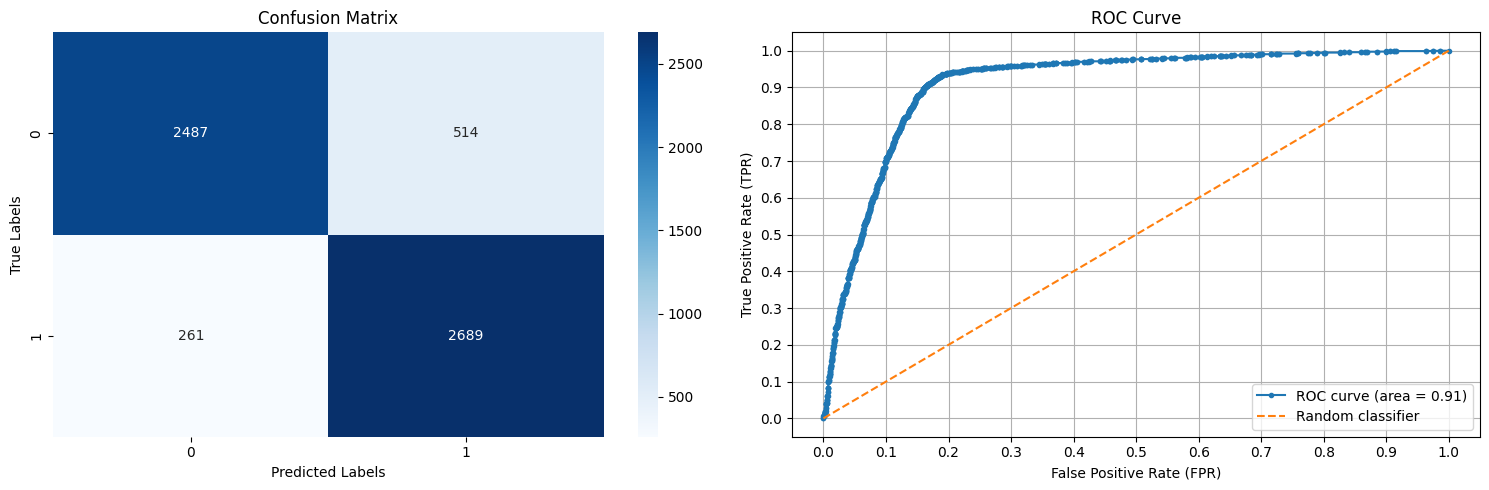

In [67]:
plt.style.use('default')
evaluate_model(pipeline_log,X_train,y_train,X_val,y_val)

##### Analysis of results Logistic Regression

    Log Loss: There is a high log loss so the predicted probabilities are not the best. We should try to improve it or try more complex models(Like Gradient Boosting)
    
    Accuracy and Precision: The model performs well in terms of accuracy and precision, should mean the is a correct classifications and positive predictions accurately.

    Confusion Matrix : We can see in general most of the predictions are corrected but there is almost the double of False Positive(FP) than False Negative(FN)

    ROC-AUC curve: The ROC-AUC curve in general looks decent and has a decent AUC value (0.91)

##### Feature Importance Logistic Regression

In [71]:
# Printing out the most important features of Logistic Regression
feature_importance(pipeline_log,X_train)

To interpretate this plot we have to check the value of each attribute the ones the right are those that make more likely that the review is classified as giant.
With this plot we can also see that **B-V** and **Temperature** play a really important part of the classifcation since they have the greates importance.

From the rest, its interest to see that the created columns Temperature and Vmag-Amag are between the most important attributes to consider for classification, so we can say that it was a good idea to include them.


##### Decision Boundary Plot Logistic Regression

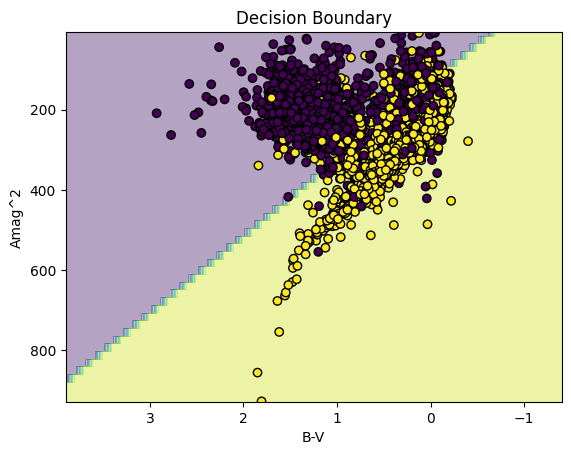

In [72]:
plot_decision_boundary(pipeline_log, X_train, y_train, X_val, y_val, "B-V", "Amag^2")

This decision boundary looks pretty correct with the line drawn that looks precise with the distribuion of the datapoints

#### 4.3.5 GradientBoostingClassifier
##### Metrics

╒═══════════╤════════════════╤══════════════════╕
│ Metric    │   Training Set │   Validation Set │
╞═══════════╪════════════════╪══════════════════╡
│ Log Loss  │       3.76876  │         7.9525   │
├───────────┼────────────────┼──────────────────┤
│ Accuracy  │       0.895439 │         0.779365 │
├───────────┼────────────────┼──────────────────┤
│ Precision │       0.877631 │         0.829907 │
╘═══════════╧════════════════╧══════════════════╛


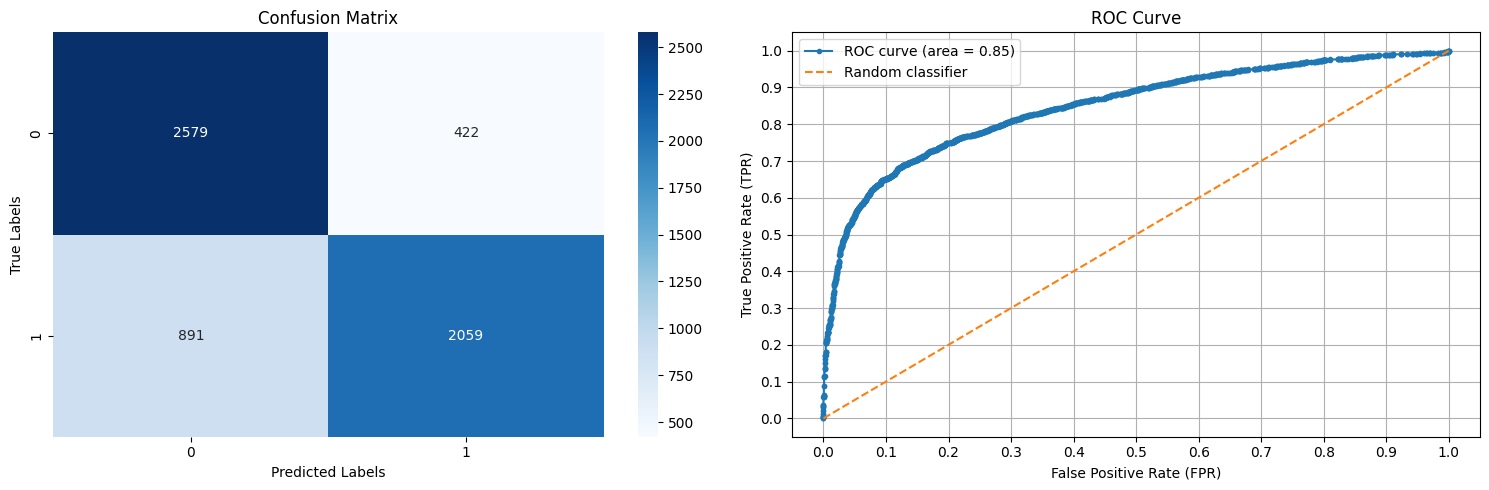

In [73]:
evaluate_model(pipeline_gbc,X_train,y_train,X_val,y_val)

##### Analysis of results GradientBoostingClassifier
The results are not the expected.

    Log Loss: Log loss is lower than Logistic Regression on training set and way worse on validation set, so this might say the model is overfitting
    
    Accuracy and Precision: The model performs really well in terms of accuracy and precision but only for TRAINING SET, compared with a poor performance on the validation set, this should mean there is overfitting.

    Confusion Matrix  We can see in general most of the predictions are corrected but there is a lot of incorrect prediciton compared with Logistic Regression and in this case there is almost the double of False Negative(FN) than False Positive(FP) 

    ROC-AUC curve: The ROC-AUC curve in general looks decent, but the AUC value (0.85) is not good compared with Logistic Regression

##### Features Importances GradientBoostingClassifier

In [74]:
feature_importance(pipeline_gbc,X_train)

To interpretate this plot we have to check which attributes have greater values.
With this plot we can see that again **B-V** and **Temperature** play a really important part of the classifcation since they have the greates importance.

This time the created columns **Amag^2** and **Vmag-Amag** are between the most important attributes to consider for classification.


##### Decision Boundary for GradientBoostingClassifier

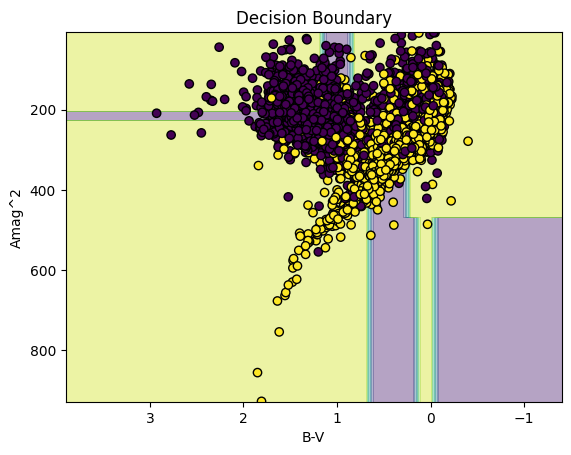

In [75]:
plot_decision_boundary(pipeline_gbc, X_train, y_train, X_val, y_val, "B-V", "Amag^2")

This decision boundary doesnt actually looks precise, for one class (yellow) it does but for the purples one looks really bad

#### 4.3.6 K-NearestNeigbours
##### Metrics

╒═══════════╤════════════════╤══════════════════╕
│ Metric    │   Training Set │   Validation Set │
╞═══════════╪════════════════╪══════════════════╡
│ Log Loss  │       3.92502  │         6.72904  │
├───────────┼────────────────┼──────────────────┤
│ Accuracy  │       0.891104 │         0.813309 │
├───────────┼────────────────┼──────────────────┤
│ Precision │       0.878072 │         0.788697 │
╘═══════════╧════════════════╧══════════════════╛


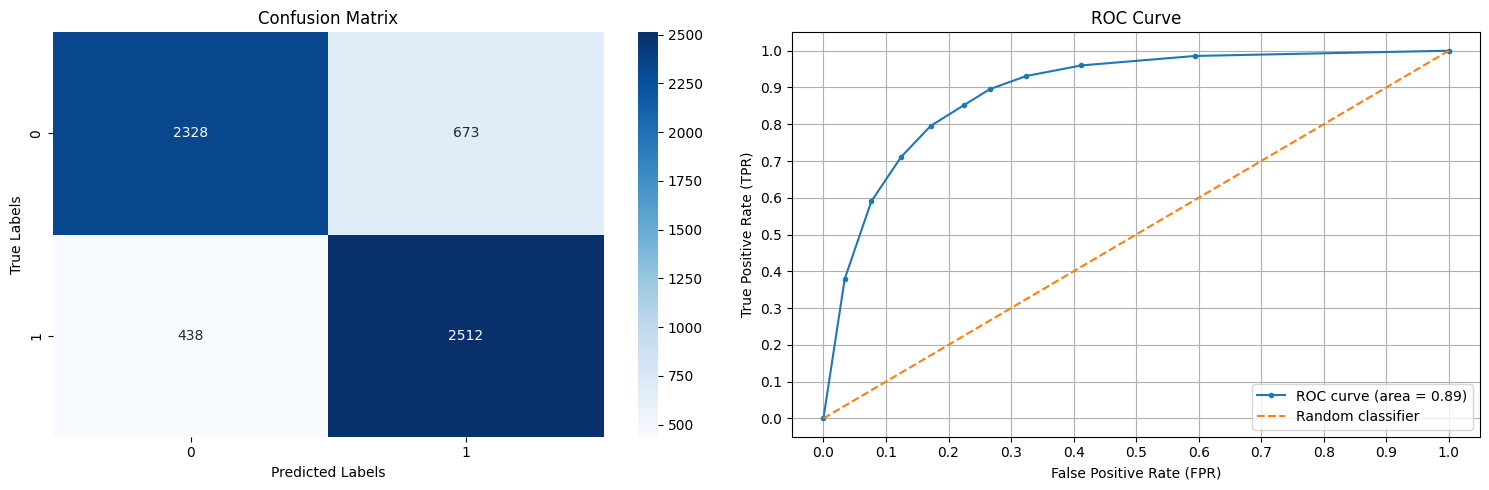

In [76]:
evaluate_model(pipeline_knn,X_train,y_train,X_val,y_val)

##### Analysis of results K-NearestNeigbours

    Log Loss: NOT CONSIDER IT FOR KNN
    
    Accuracy and Precision: The model performs really well in terms of accuracy and precision but only for TRAINING SET, compared with a poor performance on the validation set, this should mean there is overfitting.
    
    Error Rate: Error rate is good on training set but is almost the double on validation set.
    
    Confusion Matrix: We can see in general most of the predictions are corrected but there is a lot of incorrect prediciton compared with Logistic Regression there are a lot of False Positive(FP) 

    ROC-AUC curve: The ROC-AUC curve in general looks decent, but the AUC value (0.89) is not good compared with Logistic Regression

##### Feature Importances K-NearestNeigbours

In [77]:
feature_importance(pipeline_knn,X_train)

##### Decision Boundary Plot for K-NearestNeigbours

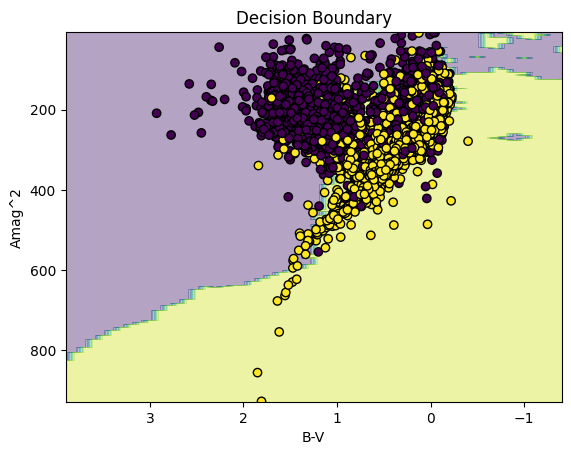

In [78]:
plot_decision_boundary(pipeline_knn, X_train, y_train, X_val, y_val, "B-V", "Amag^2")

The decision Boundary looks really decent, shows a pretty good distribution with the data points

#### 4.3.7 Ideas to improve the performance of the modes

Based on the observations on the metrics and features importances I came with the ideas to improve the models performance

##### Use more Transformer(s) :

    Feature selection - SelectKBest(f_classif) - Based on ANOVA (analysis of variance). It computes the F-value between each feature and the target variable, which measures the linear dependency between two variables. Features that are highly dependent on the target variable will have high scores
    I decided to use it since I saw that the models just consider a few attributess, then maybe choosing the correct attributes I can get a better performance

##### Drop column(s) :

    log_Vmag - This created column was not between the most important features on any of the models.


In [121]:
X_train = pd.read_csv("star_balanced_x_train.csv")
y_train = pd.read_csv("star_balanced_y_train.csv")

X_val = pd.read_csv("star_balanced_x_val.csv")
y_val = pd.read_csv("star_balanced_y_val.csv")

y_train = y_train.values.ravel()
y_val = y_val.values.ravel()

X_train =  X_train.drop(["log_Vmag"], axis=1)
X_val =  X_val.drop(["log_Vmag"], axis=1)

### 4.3.8  Actualized Logistic Regression 

╒═══════════╤════════════════╤══════════════════╕
│ Metric    │   Training Set │   Validation Set │
╞═══════════╪════════════════╪══════════════════╡
│ Log Loss  │       4.4049   │         4.8575   │
├───────────┼────────────────┼──────────────────┤
│ Accuracy  │       0.87779  │         0.865233 │
├───────────┼────────────────┼──────────────────┤
│ Precision │       0.861919 │         0.841386 │
╘═══════════╧════════════════╧══════════════════╛


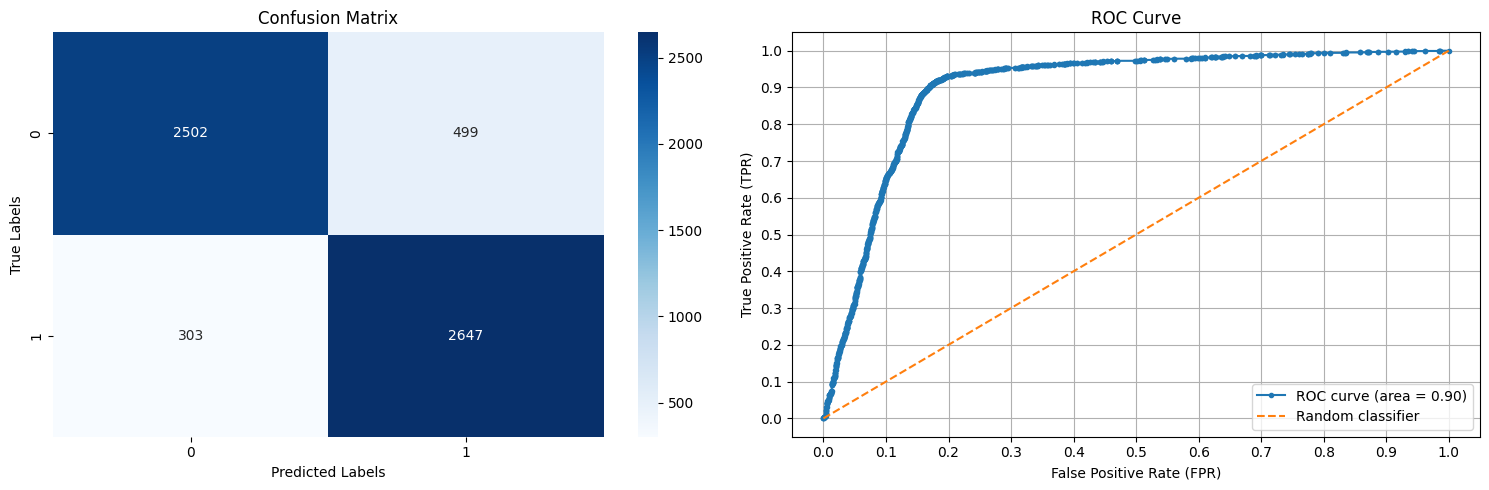

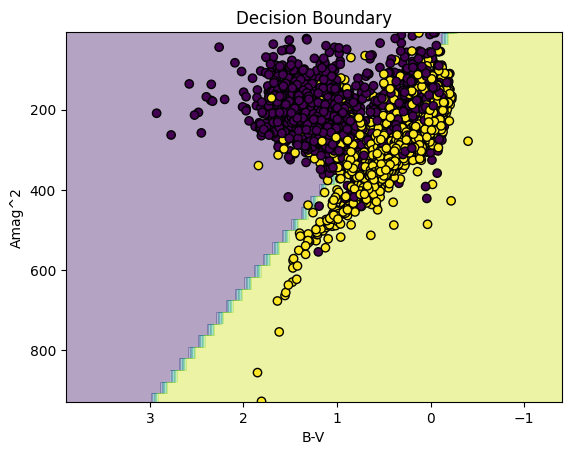

In [125]:
pipeline_log = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_classif, k=3)), 
    ("log", log)
])
# K = 3 was found as the best for performance

evaluate_model(pipeline_log,X_train,y_train,X_val,y_val)
plot_decision_boundary(pipeline_log, X_train, y_train, X_val, y_val, "B-V", "Amag^2")
feature_importance(pipeline_log,X_train)

##### Analysis of results Logistic Regression

    For Logistic Regression actually looks better to leave it as it was, since I couldnt increase the performance and its pretty weird that as long as k value was decreased different features change as the most important

### 4.3.9  Actualized GradientBoostingClassifier  


╒═══════════╤════════════════╤══════════════════╕
│ Metric    │   Training Set │   Validation Set │
╞═══════════╪════════════════╪══════════════════╡
│ Log Loss  │       4.06372  │         4.0459   │
├───────────┼────────────────┼──────────────────┤
│ Accuracy  │       0.887256 │         0.88775  │
├───────────┼────────────────┼──────────────────┤
│ Precision │       0.866637 │         0.862683 │
╘═══════════╧════════════════╧══════════════════╛


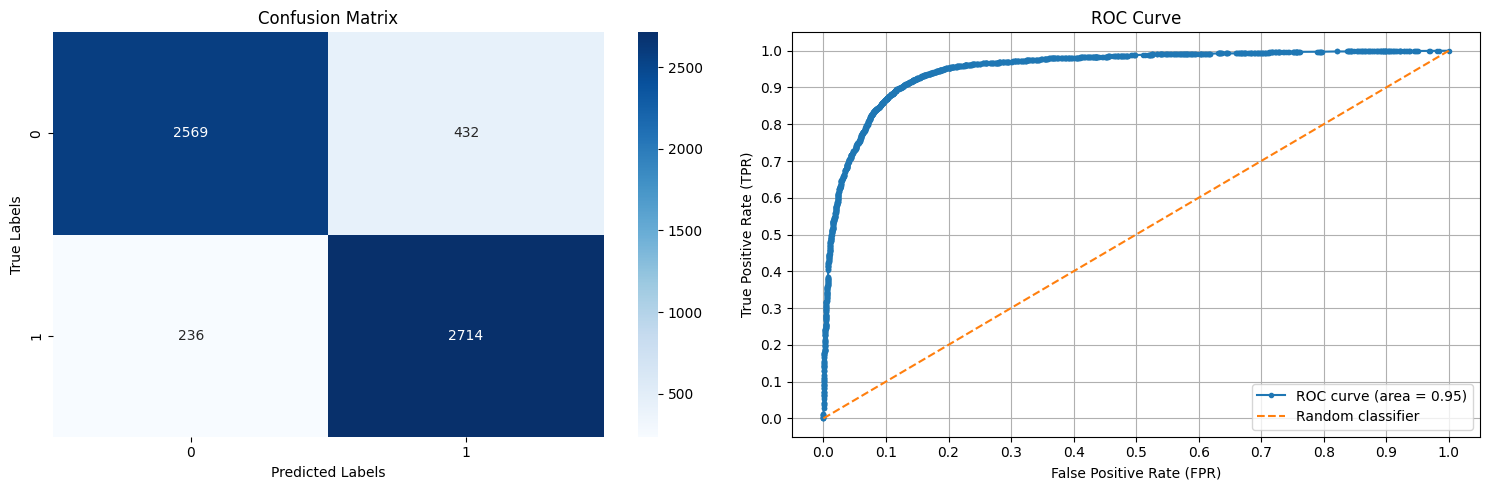

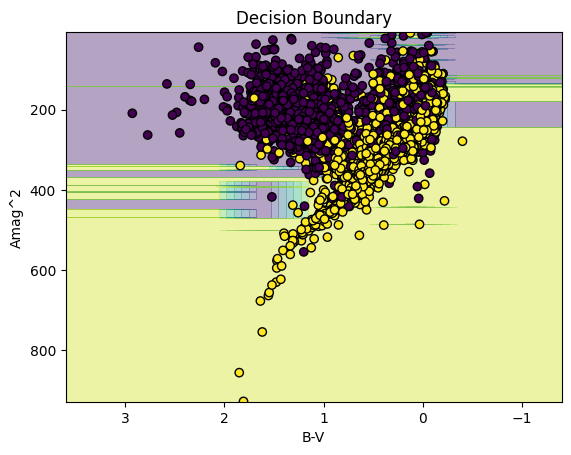

In [143]:
pipeline_gbc = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_classif, k=2)), 
    ("gbc", gbc)
])

evaluate_model(pipeline_gbc,X_train,y_train,X_val,y_val)
plot_decision_boundary(pipeline_gbc, X_train, y_train, X_val, y_val, "B-V", "Amag^2")
feature_importance(pipeline_gbc,X_train)

##### Analysis of results GradientBoostingClassifier  
GBM did a comeback!
   
    Log Loss: We could decrease the value of log loss on both sets, the lowest we have had till now.
    
    Accuracy and Precision: The model performs eventought had a decreased in accuracy and precision, has the best accuracy and precission, not only that, it had a SIGNIFICANT increase in the metrics compared with the metrics before the last transformation.
    
    Confusion Matrix :  It decreased almost 500 classifications! It decrease the False Negative(FN) predictions almost 4 times

    ROC-AUC curve: The AUC value went from 0.85 -> 0.95. Really impressive increase
And now we dont see any sign of overftting

Its just weird to see that Vmag and Plx are now the most important features.

##### Actualized K-NearestNeigbours

╒═══════════╤════════════════╤══════════════════╕
│ Metric    │   Training Set │   Validation Set │
╞═══════════╪════════════════╪══════════════════╡
│ Log Loss  │       3.99345  │         4.07013  │
├───────────┼────────────────┼──────────────────┤
│ Accuracy  │       0.889205 │         0.887078 │
├───────────┼────────────────┼──────────────────┤
│ Precision │       0.874931 │         0.867894 │
╘═══════════╧════════════════╧══════════════════╛


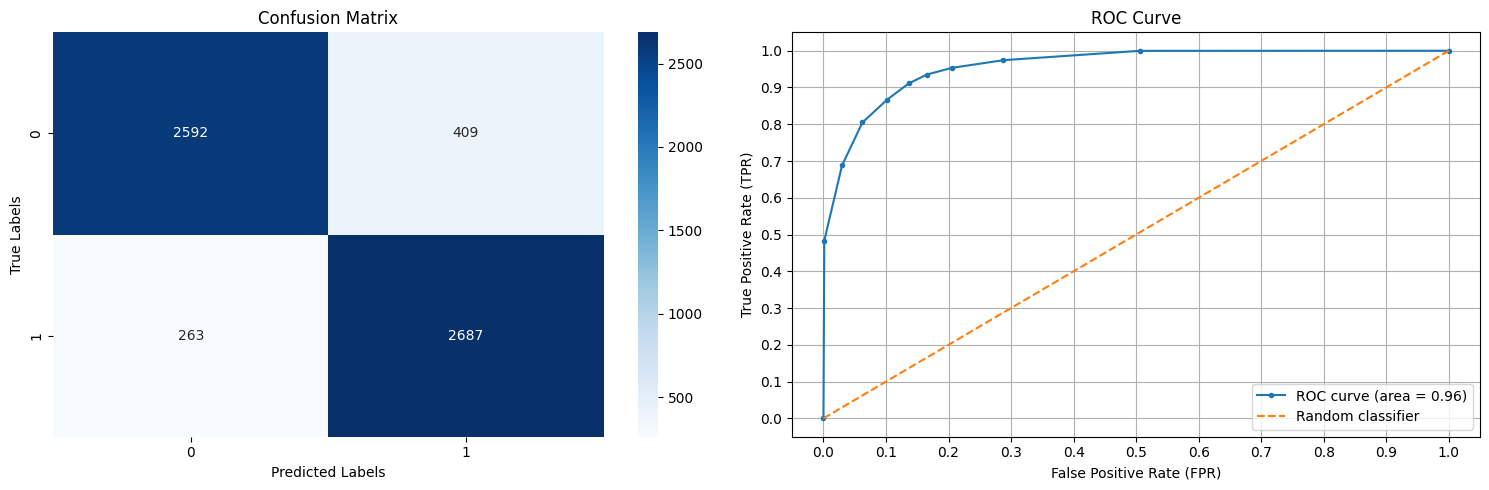

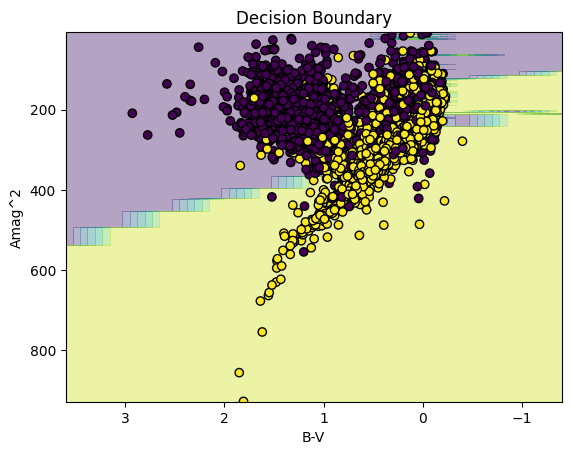

In [144]:
pipeline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_classif, k=2)), 
    ("knn", knn)
])

evaluate_model(pipeline_knn,X_train,y_train,X_val,y_val)
plot_decision_boundary(pipeline_knn, X_train, y_train, X_val, y_val, "B-V", "Amag^2")
feature_importance(pipeline_knn,X_train)

### 4.3.10  Analysis of results K-NearestNeigbours
  
    Log Loss: NOT CONSIDER IT FOR KNN
    
    Accuracy and Precision: The model increase his performance in accuracy and precision for training set, did it way better on accuracy and precission for validation set.

    Confusion Matrix :  It decreased almost 500 classifications! Decrease almost 200 on each incorrect classification, False Negative(FN) and False Positive(FP)

    ROC-AUC curve: The AUC value went from 0.89 -> 0.96. Really impressive increase until now the best.
    
And now we dont see any sign of overftting

And this one the only model that kept the same attributes importances (B-V) and Amag^2

## Chapter 5 Choosing the Final Model

It is really hard to make a decision but lets take a closer look on the metrics and decide

| Model | Metric | Training Set | Validation Set |
| --- | --- | --- | --- |
| Logistic Regression | Log Loss | 4.4049 | 4.8575 |
|  | Accuracy | 0.87779 | 0.865233 |
|  | Precision | 0.861919 | 0.841386 |
| Gradient Boosting | Log Loss | 4.06372 | 4.0459 |
|  | Accuracy | 0.887256 | 0.88775 |
|  | Precision | 0.866637 | 0.862683 |
| K-Nearest Neighbors | Log Loss | / | / |
|  | Accuracy | 0.889205 | 0.887078 | 
|  | Precision | 0.874931 | 0.867894 | 

**Log Loss: Lower is better**. Gradient Boosting has better performance on training set and on validation set compared to Logistic Regression. Point for GBC

**Accuracy: Higher is better**. KNN has the highest accuracy on the training set, but Gradient Boosting has a higher accuracy on the validation set. Point for both GBC and KNN
 
**Precision: Higher is better**. KNN has the highest precision on the training set and on validation set. Point for KNN

But this time KNN has an extra point for having the highest AUC-value(0.96)

Based on these metrics, KNN work in general the best in the metrics (training and validation)...

### **Important!**
Thus, ** K-Nearest Neighbors** was chosen as the best model.


### 5.1 Final Model K-Nearest Neighbors Classifier - Test Set 

This time lets use the test set

#### 5.1.2 Importing the test set

In [83]:
X_test = pd.read_csv("star_balanced_x_test.csv")
y_test = pd.read_csv("star_balanced_y_test.csv")

y_test = y_test.values.ravel()

X_test =  X_test.drop(["log_Vmag"], axis=1)

#### 5.1.3  K-Nearest Neighbors Classifier with best hyperparameters and Transformers

╒═══════════╤════════════════╤══════════════════╕
│ Metric    │   Training Set │   Validation Set │
╞═══════════╪════════════════╪══════════════════╡
│ Log Loss  │       3.99345  │         3.81517  │
├───────────┼────────────────┼──────────────────┤
│ Accuracy  │       0.889205 │         0.894151 │
├───────────┼────────────────┼──────────────────┤
│ Precision │       0.874931 │         0.890275 │
╘═══════════╧════════════════╧══════════════════╛


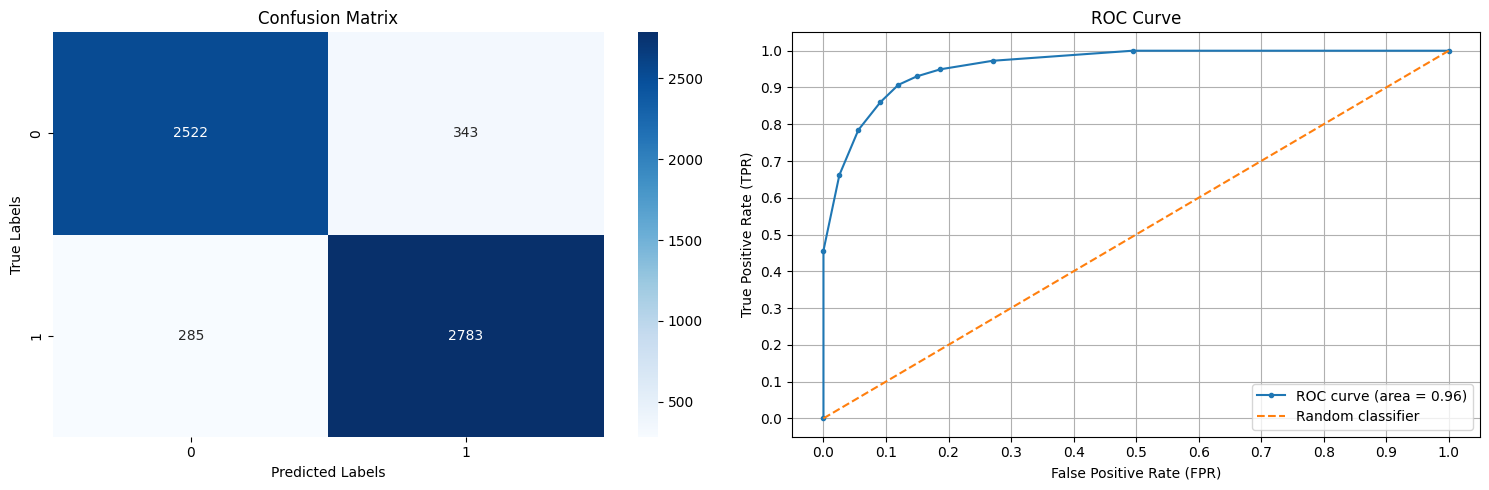

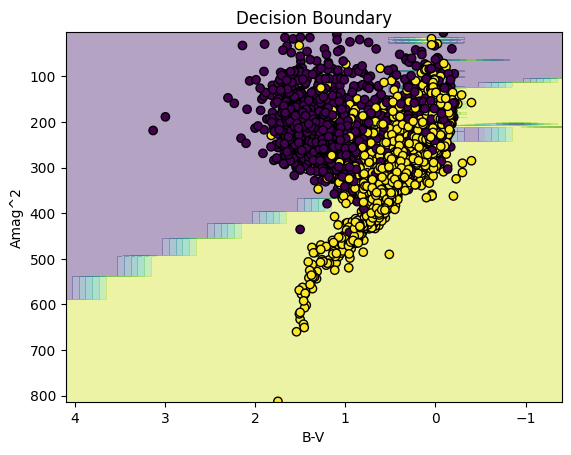

In [149]:
pipeline_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_classif, k=2)), 
    ("knn", knn)
])

evaluate_model(pipeline_knn,X_train,y_train,X_test,y_test)
plot_decision_boundary(pipeline_knn, X_train, y_train, X_test, y_test, "B-V", "Amag^2")
feature_importance(pipeline_knn,X_train)

### 5.1.4 Final  Analysis of results K-NearestNeigbours
  
    Log Loss: NOT CONSIDER IT FOR KNN
    
    Accuracy and Precision: Both has slightly higher performance performance on test, that can indicate that the model is performing well on both the training and test sets. This can suggests that the model has been trained effectively and is capable of making accurate predictions.

    Confusion Matrix : It has decent incorrect classification on False Negative(FN) and False Positive(FP), making a good model for classification.

    ROC-AUC curve: The AUC value stayed at 0.96, that is a good performance.

    Decision Boundary : It looks really accurate the distribution of the decision boundary, one can see pretty good the difference between the data points.
    
There is no sign of overftting

And this one again kept the same attributes importances (B-V) and Amag^2

### Chapter 5.1.5 - Final Conclusions

Overall now we have a good and decent model classification that could be really useful to classify stars, since its almost has 90% on both train and test set and doesnt show any possible evidence of overfitting.
Its also great to see that without using SpyType, the model could still get really impressive results and also happy that one of the created attributes(Amag^2) was one of the two most important attributes for the classification.
I am happy with the result. It is also good to mention that also the new attributes I created were a little bit but important.

Answering the questions

How effectively can a machine learning model classify Giant and Dwarf stars?
I consider the final chosen model is a really good option to classify the stars since has almost a precision of 90% making it a decent classifier.

What are the attributes that contribute the most to distinguishing between Giants and Dwarfs?
The most important were B-V color index and Amag^2, this can be obviously and as I mention in the EDA, in the distribution there was a clear difference that can make that even can do it manually.